
[Official page](https://github.com/opencv/opencv/wiki/TensorFlow-Object-Detection-API)

[ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt](https://gist.githubusercontent.com/dkurt/54a8e8b51beb3bd3f770b79e56927bd7/raw/2a20064a9d33b893dd95d2567da126d0ecd03e85/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt)

[ssd_mobilenet_v3_large_coco_2020_01_14.tar.gz](http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v3_large_coco_2020_01_14.tar.gz)

[Label.txt](https://github.com/pjreddie/darknet/blob/master/data/coco.names)

[Murtaza contest Video](https://www.computervision.zone/wp-content/uploads/2021/07/DRONE-SURVEILLANCE-CONTEST-VIDEO.mp4)

[Video Tutorial](https://youtu.be/RFqvTmEFtOE)


In [1]:
!wget http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v3_large_coco_2020_01_14.tar.gz

--2021-07-20 08:32:21--  http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v3_large_coco_2020_01_14.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.20.128, 2607:f8b0:400e:c07::80
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.20.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49318766 (47M) [application/gzip]
Saving to: ‘ssd_mobilenet_v3_large_coco_2020_01_14.tar.gz’

ssd_mobilenet_v3_la 100%[===================>]  47.03M  95.8MB/s    in 0.5s    

2021-07-20 08:32:21 (95.8 MB/s) - ‘ssd_mobilenet_v3_large_coco_2020_01_14.tar.gz’ saved [49318766/49318766]



In [2]:
!tar xvf ssd_mobilenet_v3_large_coco_2020_01_14.tar.gz

ssd_mobilenet_v3_large_coco_2020_01_14/pipeline.config
ssd_mobilenet_v3_large_coco_2020_01_14/model.ckpt.index
ssd_mobilenet_v3_large_coco_2020_01_14/model.ckpt.data-00000-of-00001
ssd_mobilenet_v3_large_coco_2020_01_14/model.tflite
ssd_mobilenet_v3_large_coco_2020_01_14/frozen_inference_graph.pb
ssd_mobilenet_v3_large_coco_2020_01_14/checkpoint
ssd_mobilenet_v3_large_coco_2020_01_14/model.ckpt.meta
ssd_mobilenet_v3_large_coco_2020_01_14/


In [3]:
!cp "/content/ssd_mobilenet_v3_large_coco_2020_01_14/frozen_inference_graph.pb" "/content/"

In [4]:
# @title ##**pbtxt file** { display-mode: "form" }
%%writefile ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt
node {
  name: "normalized_input_image_tensor"
  op: "Placeholder"
  attr {
    key: "dtype"
    value {
      type: DT_FLOAT
    }
  }
  attr {
    key: "shape"
    value {
      shape {
        dim {
          size: 1
        }
        dim {
          size: 320
        }
        dim {
          size: 320
        }
        dim {
          size: 3
        }
      }
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/Conv/Conv2D"
  op: "Conv2D"
  input: "normalized_input_image_tensor"
  input: "FeatureExtractor/MobilenetV3/Conv/weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "explicit_paddings"
    value {
      list {
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 2
        i: 2
        i: 1
      }
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/Conv/BatchNorm/FusedBatchNormV3"
  op: "FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/Conv/Conv2D"
  input: "FeatureExtractor/MobilenetV3/Conv/BatchNorm/gamma"
  input: "FeatureExtractor/MobilenetV3/Conv/BatchNorm/beta"
  input: "FeatureExtractor/MobilenetV3/Conv/BatchNorm/moving_mean"
  input: "FeatureExtractor/MobilenetV3/Conv/BatchNorm/moving_variance"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "epsilon"
    value {
      f: 0.001
    }
  }
  attr {
    key: "U"
    value {
      type: DT_FLOAT
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/Conv/hard_swish/add"
  op: "AddV2"
  input: "FeatureExtractor/MobilenetV3/Conv/BatchNorm/FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/Conv/hard_swish/add/y"
}
node {
  name: "FeatureExtractor/MobilenetV3/Conv/hard_swish/Relu6"
  op: "Relu6"
  input: "FeatureExtractor/MobilenetV3/Conv/hard_swish/add"
}
node {
  name: "FeatureExtractor/MobilenetV3/Conv/hard_swish/mul"
  op: "Mul"
  input: "FeatureExtractor/MobilenetV3/Conv/BatchNorm/FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/Conv/hard_swish/Relu6"
}
node {
  name: "FeatureExtractor/MobilenetV3/Conv/hard_swish/mul_1"
  op: "Mul"
  input: "FeatureExtractor/MobilenetV3/Conv/hard_swish/mul"
  input: "FeatureExtractor/MobilenetV3/Conv/hard_swish/mul_1/y"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv/depthwise/depthwise"
  op: "DepthwiseConv2dNative"
  input: "FeatureExtractor/MobilenetV3/Conv/hard_swish/mul_1"
  input: "FeatureExtractor/MobilenetV3/expanded_conv/depthwise/depthwise_weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv/depthwise/BatchNorm/FusedBatchNormV3"
  op: "FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv/depthwise/depthwise"
  input: "FeatureExtractor/MobilenetV3/expanded_conv/depthwise/BatchNorm/gamma"
  input: "FeatureExtractor/MobilenetV3/expanded_conv/depthwise/BatchNorm/beta"
  input: "FeatureExtractor/MobilenetV3/expanded_conv/depthwise/BatchNorm/moving_mean"
  input: "FeatureExtractor/MobilenetV3/expanded_conv/depthwise/BatchNorm/moving_variance"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "epsilon"
    value {
      f: 0.001
    }
  }
  attr {
    key: "U"
    value {
      type: DT_FLOAT
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv/depthwise/Relu"
  op: "Relu"
  input: "FeatureExtractor/MobilenetV3/expanded_conv/depthwise/BatchNorm/FusedBatchNormV3"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv/project/Conv2D"
  op: "Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv/depthwise/Relu"
  input: "FeatureExtractor/MobilenetV3/expanded_conv/project/weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "explicit_paddings"
    value {
      list {
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv/project/BatchNorm/FusedBatchNormV3"
  op: "FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv/project/Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv/project/BatchNorm/gamma"
  input: "FeatureExtractor/MobilenetV3/expanded_conv/project/BatchNorm/beta"
  input: "FeatureExtractor/MobilenetV3/expanded_conv/project/BatchNorm/moving_mean"
  input: "FeatureExtractor/MobilenetV3/expanded_conv/project/BatchNorm/moving_variance"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "epsilon"
    value {
      f: 0.001
    }
  }
  attr {
    key: "U"
    value {
      type: DT_FLOAT
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv/add"
  op: "AddV2"
  input: "FeatureExtractor/MobilenetV3/expanded_conv/project/BatchNorm/FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/Conv/hard_swish/mul_1"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_1/input"
  op: "Identity"
  input: "FeatureExtractor/MobilenetV3/expanded_conv/add"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_1/expand/Conv2D"
  op: "Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_1/input"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_1/expand/weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "explicit_paddings"
    value {
      list {
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_1/expand/BatchNorm/FusedBatchNormV3"
  op: "FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_1/expand/Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_1/expand/BatchNorm/gamma"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_1/expand/BatchNorm/beta"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_1/expand/BatchNorm/moving_mean"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_1/expand/BatchNorm/moving_variance"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "epsilon"
    value {
      f: 0.001
    }
  }
  attr {
    key: "U"
    value {
      type: DT_FLOAT
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_1/expand/Relu"
  op: "Relu"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_1/expand/BatchNorm/FusedBatchNormV3"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_1/depthwise/depthwise"
  op: "DepthwiseConv2dNative"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_1/expand/Relu"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_1/depthwise/depthwise_weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 2
        i: 2
        i: 1
      }
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_1/depthwise/BatchNorm/FusedBatchNormV3"
  op: "FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_1/depthwise/depthwise"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_1/depthwise/BatchNorm/gamma"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_1/depthwise/BatchNorm/beta"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_1/depthwise/BatchNorm/moving_mean"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_1/depthwise/BatchNorm/moving_variance"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "epsilon"
    value {
      f: 0.001
    }
  }
  attr {
    key: "U"
    value {
      type: DT_FLOAT
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_1/depthwise/Relu"
  op: "Relu"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_1/depthwise/BatchNorm/FusedBatchNormV3"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_1/project/Conv2D"
  op: "Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_1/depthwise/Relu"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_1/project/weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "explicit_paddings"
    value {
      list {
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_1/project/BatchNorm/FusedBatchNormV3"
  op: "FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_1/project/Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_1/project/BatchNorm/gamma"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_1/project/BatchNorm/beta"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_1/project/BatchNorm/moving_mean"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_1/project/BatchNorm/moving_variance"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "epsilon"
    value {
      f: 0.001
    }
  }
  attr {
    key: "U"
    value {
      type: DT_FLOAT
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_1/output"
  op: "Identity"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_1/project/BatchNorm/FusedBatchNormV3"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_2/expand/Conv2D"
  op: "Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_1/output"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_2/expand/weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "explicit_paddings"
    value {
      list {
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_2/expand/BatchNorm/FusedBatchNormV3"
  op: "FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_2/expand/Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_2/expand/BatchNorm/gamma"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_2/expand/BatchNorm/beta"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_2/expand/BatchNorm/moving_mean"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_2/expand/BatchNorm/moving_variance"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "epsilon"
    value {
      f: 0.001
    }
  }
  attr {
    key: "U"
    value {
      type: DT_FLOAT
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_2/expand/Relu"
  op: "Relu"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_2/expand/BatchNorm/FusedBatchNormV3"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_2/depthwise/depthwise"
  op: "DepthwiseConv2dNative"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_2/expand/Relu"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_2/depthwise/depthwise_weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_2/depthwise/BatchNorm/FusedBatchNormV3"
  op: "FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_2/depthwise/depthwise"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_2/depthwise/BatchNorm/gamma"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_2/depthwise/BatchNorm/beta"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_2/depthwise/BatchNorm/moving_mean"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_2/depthwise/BatchNorm/moving_variance"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "epsilon"
    value {
      f: 0.001
    }
  }
  attr {
    key: "U"
    value {
      type: DT_FLOAT
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_2/depthwise/Relu"
  op: "Relu"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_2/depthwise/BatchNorm/FusedBatchNormV3"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_2/project/Conv2D"
  op: "Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_2/depthwise/Relu"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_2/project/weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "explicit_paddings"
    value {
      list {
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_2/project/BatchNorm/FusedBatchNormV3"
  op: "FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_2/project/Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_2/project/BatchNorm/gamma"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_2/project/BatchNorm/beta"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_2/project/BatchNorm/moving_mean"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_2/project/BatchNorm/moving_variance"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "epsilon"
    value {
      f: 0.001
    }
  }
  attr {
    key: "U"
    value {
      type: DT_FLOAT
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_2/add"
  op: "AddV2"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_2/project/BatchNorm/FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_1/output"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_3/input"
  op: "Identity"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_2/add"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_3/expand/Conv2D"
  op: "Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_3/input"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_3/expand/weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "explicit_paddings"
    value {
      list {
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_3/expand/BatchNorm/FusedBatchNormV3"
  op: "FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_3/expand/Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_3/expand/BatchNorm/gamma"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_3/expand/BatchNorm/beta"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_3/expand/BatchNorm/moving_mean"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_3/expand/BatchNorm/moving_variance"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "epsilon"
    value {
      f: 0.001
    }
  }
  attr {
    key: "U"
    value {
      type: DT_FLOAT
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_3/expand/Relu"
  op: "Relu"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_3/expand/BatchNorm/FusedBatchNormV3"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_3/depthwise/depthwise"
  op: "DepthwiseConv2dNative"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_3/expand/Relu"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_3/depthwise/depthwise_weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 2
        i: 2
        i: 1
      }
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_3/depthwise/BatchNorm/FusedBatchNormV3"
  op: "FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_3/depthwise/depthwise"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_3/depthwise/BatchNorm/gamma"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_3/depthwise/BatchNorm/beta"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_3/depthwise/BatchNorm/moving_mean"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_3/depthwise/BatchNorm/moving_variance"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "epsilon"
    value {
      f: 0.001
    }
  }
  attr {
    key: "U"
    value {
      type: DT_FLOAT
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_3/depthwise/Relu"
  op: "Relu"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_3/depthwise/BatchNorm/FusedBatchNormV3"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_3/squeeze_excite/Mean"
  op: "Mean"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_3/depthwise/Relu"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_3/squeeze_excite/Mean/reduction_indices"
  attr {
    key: "keep_dims"
    value {
      b: true
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_3/squeeze_excite/Conv/Conv2D"
  op: "Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_3/squeeze_excite/Mean"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_3/squeeze_excite/Conv/weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "explicit_paddings"
    value {
      list {
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_3/squeeze_excite/Conv/BiasAdd"
  op: "BiasAdd"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_3/squeeze_excite/Conv/Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_3/squeeze_excite/Conv/biases"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_3/squeeze_excite/Conv/Relu"
  op: "Relu"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_3/squeeze_excite/Conv/BiasAdd"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_3/squeeze_excite/Conv_1/Conv2D"
  op: "Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_3/squeeze_excite/Conv/Relu"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_3/squeeze_excite/Conv_1/weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "explicit_paddings"
    value {
      list {
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_3/squeeze_excite/Conv_1/BiasAdd"
  op: "BiasAdd"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_3/squeeze_excite/Conv_1/Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_3/squeeze_excite/Conv_1/biases"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_3/squeeze_excite/Conv_1/add"
  op: "AddV2"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_3/squeeze_excite/Conv_1/BiasAdd"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_3/squeeze_excite/Conv_1/add/y"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_3/squeeze_excite/Conv_1/Relu6"
  op: "Relu6"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_3/squeeze_excite/Conv_1/add"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_3/squeeze_excite/Conv_1/mul"
  op: "Mul"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_3/squeeze_excite/Conv_1/Relu6"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_3/squeeze_excite/Conv_1/mul/y"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_3/squeeze_excite/mul"
  op: "Mul"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_3/depthwise/Relu"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_3/squeeze_excite/Conv_1/mul"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_3/project/Conv2D"
  op: "Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_3/squeeze_excite/mul"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_3/project/weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "explicit_paddings"
    value {
      list {
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_3/project/BatchNorm/FusedBatchNormV3"
  op: "FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_3/project/Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_3/project/BatchNorm/gamma"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_3/project/BatchNorm/beta"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_3/project/BatchNorm/moving_mean"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_3/project/BatchNorm/moving_variance"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "epsilon"
    value {
      f: 0.001
    }
  }
  attr {
    key: "U"
    value {
      type: DT_FLOAT
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_3/output"
  op: "Identity"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_3/project/BatchNorm/FusedBatchNormV3"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_4/expand/Conv2D"
  op: "Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_3/output"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_4/expand/weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "explicit_paddings"
    value {
      list {
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_4/expand/BatchNorm/FusedBatchNormV3"
  op: "FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_4/expand/Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_4/expand/BatchNorm/gamma"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_4/expand/BatchNorm/beta"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_4/expand/BatchNorm/moving_mean"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_4/expand/BatchNorm/moving_variance"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "epsilon"
    value {
      f: 0.001
    }
  }
  attr {
    key: "U"
    value {
      type: DT_FLOAT
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_4/expand/Relu"
  op: "Relu"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_4/expand/BatchNorm/FusedBatchNormV3"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_4/depthwise/depthwise"
  op: "DepthwiseConv2dNative"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_4/expand/Relu"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_4/depthwise/depthwise_weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_4/depthwise/BatchNorm/FusedBatchNormV3"
  op: "FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_4/depthwise/depthwise"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_4/depthwise/BatchNorm/gamma"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_4/depthwise/BatchNorm/beta"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_4/depthwise/BatchNorm/moving_mean"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_4/depthwise/BatchNorm/moving_variance"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "epsilon"
    value {
      f: 0.001
    }
  }
  attr {
    key: "U"
    value {
      type: DT_FLOAT
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_4/depthwise/Relu"
  op: "Relu"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_4/depthwise/BatchNorm/FusedBatchNormV3"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_4/squeeze_excite/Mean"
  op: "Mean"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_4/depthwise/Relu"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_4/squeeze_excite/Mean/reduction_indices"
  attr {
    key: "keep_dims"
    value {
      b: true
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_4/squeeze_excite/Conv/Conv2D"
  op: "Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_4/squeeze_excite/Mean"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_4/squeeze_excite/Conv/weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "explicit_paddings"
    value {
      list {
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_4/squeeze_excite/Conv/BiasAdd"
  op: "BiasAdd"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_4/squeeze_excite/Conv/Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_4/squeeze_excite/Conv/biases"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_4/squeeze_excite/Conv/Relu"
  op: "Relu"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_4/squeeze_excite/Conv/BiasAdd"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_4/squeeze_excite/Conv_1/Conv2D"
  op: "Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_4/squeeze_excite/Conv/Relu"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_4/squeeze_excite/Conv_1/weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "explicit_paddings"
    value {
      list {
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_4/squeeze_excite/Conv_1/BiasAdd"
  op: "BiasAdd"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_4/squeeze_excite/Conv_1/Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_4/squeeze_excite/Conv_1/biases"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_4/squeeze_excite/Conv_1/add"
  op: "AddV2"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_4/squeeze_excite/Conv_1/BiasAdd"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_4/squeeze_excite/Conv_1/add/y"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_4/squeeze_excite/Conv_1/Relu6"
  op: "Relu6"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_4/squeeze_excite/Conv_1/add"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_4/squeeze_excite/Conv_1/mul"
  op: "Mul"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_4/squeeze_excite/Conv_1/Relu6"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_4/squeeze_excite/Conv_1/mul/y"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_4/squeeze_excite/mul"
  op: "Mul"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_4/depthwise/Relu"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_4/squeeze_excite/Conv_1/mul"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_4/project/Conv2D"
  op: "Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_4/squeeze_excite/mul"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_4/project/weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "explicit_paddings"
    value {
      list {
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_4/project/BatchNorm/FusedBatchNormV3"
  op: "FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_4/project/Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_4/project/BatchNorm/gamma"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_4/project/BatchNorm/beta"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_4/project/BatchNorm/moving_mean"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_4/project/BatchNorm/moving_variance"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "epsilon"
    value {
      f: 0.001
    }
  }
  attr {
    key: "U"
    value {
      type: DT_FLOAT
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_4/add"
  op: "AddV2"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_4/project/BatchNorm/FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_3/output"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_5/input"
  op: "Identity"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_4/add"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_5/expand/Conv2D"
  op: "Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_5/input"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_5/expand/weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "explicit_paddings"
    value {
      list {
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_5/expand/BatchNorm/FusedBatchNormV3"
  op: "FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_5/expand/Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_5/expand/BatchNorm/gamma"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_5/expand/BatchNorm/beta"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_5/expand/BatchNorm/moving_mean"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_5/expand/BatchNorm/moving_variance"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "epsilon"
    value {
      f: 0.001
    }
  }
  attr {
    key: "U"
    value {
      type: DT_FLOAT
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_5/expand/Relu"
  op: "Relu"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_5/expand/BatchNorm/FusedBatchNormV3"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_5/depthwise/depthwise"
  op: "DepthwiseConv2dNative"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_5/expand/Relu"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_5/depthwise/depthwise_weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_5/depthwise/BatchNorm/FusedBatchNormV3"
  op: "FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_5/depthwise/depthwise"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_5/depthwise/BatchNorm/gamma"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_5/depthwise/BatchNorm/beta"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_5/depthwise/BatchNorm/moving_mean"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_5/depthwise/BatchNorm/moving_variance"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "epsilon"
    value {
      f: 0.001
    }
  }
  attr {
    key: "U"
    value {
      type: DT_FLOAT
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_5/depthwise/Relu"
  op: "Relu"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_5/depthwise/BatchNorm/FusedBatchNormV3"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_5/squeeze_excite/Mean"
  op: "Mean"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_5/depthwise/Relu"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_5/squeeze_excite/Mean/reduction_indices"
  attr {
    key: "keep_dims"
    value {
      b: true
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_5/squeeze_excite/Conv/Conv2D"
  op: "Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_5/squeeze_excite/Mean"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_5/squeeze_excite/Conv/weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "explicit_paddings"
    value {
      list {
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_5/squeeze_excite/Conv/BiasAdd"
  op: "BiasAdd"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_5/squeeze_excite/Conv/Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_5/squeeze_excite/Conv/biases"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_5/squeeze_excite/Conv/Relu"
  op: "Relu"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_5/squeeze_excite/Conv/BiasAdd"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_5/squeeze_excite/Conv_1/Conv2D"
  op: "Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_5/squeeze_excite/Conv/Relu"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_5/squeeze_excite/Conv_1/weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "explicit_paddings"
    value {
      list {
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_5/squeeze_excite/Conv_1/BiasAdd"
  op: "BiasAdd"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_5/squeeze_excite/Conv_1/Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_5/squeeze_excite/Conv_1/biases"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_5/squeeze_excite/Conv_1/add"
  op: "AddV2"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_5/squeeze_excite/Conv_1/BiasAdd"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_5/squeeze_excite/Conv_1/add/y"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_5/squeeze_excite/Conv_1/Relu6"
  op: "Relu6"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_5/squeeze_excite/Conv_1/add"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_5/squeeze_excite/Conv_1/mul"
  op: "Mul"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_5/squeeze_excite/Conv_1/Relu6"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_5/squeeze_excite/Conv_1/mul/y"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_5/squeeze_excite/mul"
  op: "Mul"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_5/depthwise/Relu"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_5/squeeze_excite/Conv_1/mul"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_5/project/Conv2D"
  op: "Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_5/squeeze_excite/mul"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_5/project/weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "explicit_paddings"
    value {
      list {
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_5/project/BatchNorm/FusedBatchNormV3"
  op: "FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_5/project/Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_5/project/BatchNorm/gamma"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_5/project/BatchNorm/beta"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_5/project/BatchNorm/moving_mean"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_5/project/BatchNorm/moving_variance"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "epsilon"
    value {
      f: 0.001
    }
  }
  attr {
    key: "U"
    value {
      type: DT_FLOAT
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_5/add"
  op: "AddV2"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_5/project/BatchNorm/FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_5/input"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_6/input"
  op: "Identity"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_5/add"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_6/expand/Conv2D"
  op: "Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_6/input"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_6/expand/weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "explicit_paddings"
    value {
      list {
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_6/expand/BatchNorm/FusedBatchNormV3"
  op: "FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_6/expand/Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_6/expand/BatchNorm/gamma"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_6/expand/BatchNorm/beta"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_6/expand/BatchNorm/moving_mean"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_6/expand/BatchNorm/moving_variance"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "epsilon"
    value {
      f: 0.001
    }
  }
  attr {
    key: "U"
    value {
      type: DT_FLOAT
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_6/expand/hard_swish/add"
  op: "AddV2"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_6/expand/BatchNorm/FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_6/expand/hard_swish/add/y"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_6/expand/hard_swish/Relu6"
  op: "Relu6"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_6/expand/hard_swish/add"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_6/expand/hard_swish/mul"
  op: "Mul"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_6/expand/BatchNorm/FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_6/expand/hard_swish/Relu6"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_6/expand/hard_swish/mul_1"
  op: "Mul"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_6/expand/hard_swish/mul"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_6/expand/hard_swish/mul_1/y"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_6/depthwise/depthwise"
  op: "DepthwiseConv2dNative"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_6/expand/hard_swish/mul_1"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_6/depthwise/depthwise_weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 2
        i: 2
        i: 1
      }
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_6/depthwise/BatchNorm/FusedBatchNormV3"
  op: "FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_6/depthwise/depthwise"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_6/depthwise/BatchNorm/gamma"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_6/depthwise/BatchNorm/beta"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_6/depthwise/BatchNorm/moving_mean"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_6/depthwise/BatchNorm/moving_variance"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "epsilon"
    value {
      f: 0.001
    }
  }
  attr {
    key: "U"
    value {
      type: DT_FLOAT
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_6/depthwise/hard_swish/add"
  op: "AddV2"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_6/depthwise/BatchNorm/FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_6/depthwise/hard_swish/add/y"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_6/depthwise/hard_swish/Relu6"
  op: "Relu6"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_6/depthwise/hard_swish/add"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_6/depthwise/hard_swish/mul"
  op: "Mul"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_6/depthwise/BatchNorm/FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_6/depthwise/hard_swish/Relu6"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_6/depthwise/hard_swish/mul_1"
  op: "Mul"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_6/depthwise/hard_swish/mul"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_6/depthwise/hard_swish/mul_1/y"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_6/project/Conv2D"
  op: "Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_6/depthwise/hard_swish/mul_1"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_6/project/weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "explicit_paddings"
    value {
      list {
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_6/project/BatchNorm/FusedBatchNormV3"
  op: "FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_6/project/Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_6/project/BatchNorm/gamma"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_6/project/BatchNorm/beta"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_6/project/BatchNorm/moving_mean"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_6/project/BatchNorm/moving_variance"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "epsilon"
    value {
      f: 0.001
    }
  }
  attr {
    key: "U"
    value {
      type: DT_FLOAT
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_6/output"
  op: "Identity"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_6/project/BatchNorm/FusedBatchNormV3"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_7/expand/Conv2D"
  op: "Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_6/output"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_7/expand/weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "explicit_paddings"
    value {
      list {
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_7/expand/BatchNorm/FusedBatchNormV3"
  op: "FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_7/expand/Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_7/expand/BatchNorm/gamma"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_7/expand/BatchNorm/beta"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_7/expand/BatchNorm/moving_mean"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_7/expand/BatchNorm/moving_variance"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "epsilon"
    value {
      f: 0.001
    }
  }
  attr {
    key: "U"
    value {
      type: DT_FLOAT
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_7/expand/hard_swish/add"
  op: "AddV2"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_7/expand/BatchNorm/FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_7/expand/hard_swish/add/y"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_7/expand/hard_swish/Relu6"
  op: "Relu6"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_7/expand/hard_swish/add"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_7/expand/hard_swish/mul"
  op: "Mul"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_7/expand/BatchNorm/FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_7/expand/hard_swish/Relu6"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_7/expand/hard_swish/mul_1"
  op: "Mul"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_7/expand/hard_swish/mul"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_7/expand/hard_swish/mul_1/y"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_7/depthwise/depthwise"
  op: "DepthwiseConv2dNative"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_7/expand/hard_swish/mul_1"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_7/depthwise/depthwise_weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_7/depthwise/BatchNorm/FusedBatchNormV3"
  op: "FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_7/depthwise/depthwise"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_7/depthwise/BatchNorm/gamma"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_7/depthwise/BatchNorm/beta"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_7/depthwise/BatchNorm/moving_mean"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_7/depthwise/BatchNorm/moving_variance"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "epsilon"
    value {
      f: 0.001
    }
  }
  attr {
    key: "U"
    value {
      type: DT_FLOAT
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_7/depthwise/hard_swish/add"
  op: "AddV2"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_7/depthwise/BatchNorm/FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_7/depthwise/hard_swish/add/y"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_7/depthwise/hard_swish/Relu6"
  op: "Relu6"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_7/depthwise/hard_swish/add"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_7/depthwise/hard_swish/mul"
  op: "Mul"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_7/depthwise/BatchNorm/FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_7/depthwise/hard_swish/Relu6"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_7/depthwise/hard_swish/mul_1"
  op: "Mul"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_7/depthwise/hard_swish/mul"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_7/depthwise/hard_swish/mul_1/y"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_7/project/Conv2D"
  op: "Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_7/depthwise/hard_swish/mul_1"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_7/project/weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "explicit_paddings"
    value {
      list {
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_7/project/BatchNorm/FusedBatchNormV3"
  op: "FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_7/project/Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_7/project/BatchNorm/gamma"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_7/project/BatchNorm/beta"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_7/project/BatchNorm/moving_mean"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_7/project/BatchNorm/moving_variance"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "epsilon"
    value {
      f: 0.001
    }
  }
  attr {
    key: "U"
    value {
      type: DT_FLOAT
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_7/add"
  op: "AddV2"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_7/project/BatchNorm/FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_6/output"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_8/input"
  op: "Identity"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_7/add"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_8/expand/Conv2D"
  op: "Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_8/input"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_8/expand/weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "explicit_paddings"
    value {
      list {
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_8/expand/BatchNorm/FusedBatchNormV3"
  op: "FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_8/expand/Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_8/expand/BatchNorm/gamma"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_8/expand/BatchNorm/beta"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_8/expand/BatchNorm/moving_mean"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_8/expand/BatchNorm/moving_variance"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "epsilon"
    value {
      f: 0.001
    }
  }
  attr {
    key: "U"
    value {
      type: DT_FLOAT
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_8/expand/hard_swish/add"
  op: "AddV2"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_8/expand/BatchNorm/FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_8/expand/hard_swish/add/y"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_8/expand/hard_swish/Relu6"
  op: "Relu6"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_8/expand/hard_swish/add"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_8/expand/hard_swish/mul"
  op: "Mul"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_8/expand/BatchNorm/FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_8/expand/hard_swish/Relu6"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_8/expand/hard_swish/mul_1"
  op: "Mul"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_8/expand/hard_swish/mul"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_8/expand/hard_swish/mul_1/y"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_8/depthwise/depthwise"
  op: "DepthwiseConv2dNative"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_8/expand/hard_swish/mul_1"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_8/depthwise/depthwise_weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_8/depthwise/BatchNorm/FusedBatchNormV3"
  op: "FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_8/depthwise/depthwise"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_8/depthwise/BatchNorm/gamma"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_8/depthwise/BatchNorm/beta"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_8/depthwise/BatchNorm/moving_mean"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_8/depthwise/BatchNorm/moving_variance"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "epsilon"
    value {
      f: 0.001
    }
  }
  attr {
    key: "U"
    value {
      type: DT_FLOAT
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_8/depthwise/hard_swish/add"
  op: "AddV2"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_8/depthwise/BatchNorm/FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_8/depthwise/hard_swish/add/y"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_8/depthwise/hard_swish/Relu6"
  op: "Relu6"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_8/depthwise/hard_swish/add"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_8/depthwise/hard_swish/mul"
  op: "Mul"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_8/depthwise/BatchNorm/FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_8/depthwise/hard_swish/Relu6"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_8/depthwise/hard_swish/mul_1"
  op: "Mul"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_8/depthwise/hard_swish/mul"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_8/depthwise/hard_swish/mul_1/y"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_8/project/Conv2D"
  op: "Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_8/depthwise/hard_swish/mul_1"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_8/project/weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "explicit_paddings"
    value {
      list {
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_8/project/BatchNorm/FusedBatchNormV3"
  op: "FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_8/project/Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_8/project/BatchNorm/gamma"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_8/project/BatchNorm/beta"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_8/project/BatchNorm/moving_mean"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_8/project/BatchNorm/moving_variance"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "epsilon"
    value {
      f: 0.001
    }
  }
  attr {
    key: "U"
    value {
      type: DT_FLOAT
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_8/add"
  op: "AddV2"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_8/project/BatchNorm/FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_8/input"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_9/input"
  op: "Identity"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_8/add"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_9/expand/Conv2D"
  op: "Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_9/input"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_9/expand/weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "explicit_paddings"
    value {
      list {
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_9/expand/BatchNorm/FusedBatchNormV3"
  op: "FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_9/expand/Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_9/expand/BatchNorm/gamma"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_9/expand/BatchNorm/beta"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_9/expand/BatchNorm/moving_mean"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_9/expand/BatchNorm/moving_variance"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "epsilon"
    value {
      f: 0.001
    }
  }
  attr {
    key: "U"
    value {
      type: DT_FLOAT
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_9/expand/hard_swish/add"
  op: "AddV2"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_9/expand/BatchNorm/FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_9/expand/hard_swish/add/y"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_9/expand/hard_swish/Relu6"
  op: "Relu6"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_9/expand/hard_swish/add"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_9/expand/hard_swish/mul"
  op: "Mul"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_9/expand/BatchNorm/FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_9/expand/hard_swish/Relu6"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_9/expand/hard_swish/mul_1"
  op: "Mul"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_9/expand/hard_swish/mul"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_9/expand/hard_swish/mul_1/y"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_9/depthwise/depthwise"
  op: "DepthwiseConv2dNative"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_9/expand/hard_swish/mul_1"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_9/depthwise/depthwise_weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_9/depthwise/BatchNorm/FusedBatchNormV3"
  op: "FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_9/depthwise/depthwise"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_9/depthwise/BatchNorm/gamma"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_9/depthwise/BatchNorm/beta"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_9/depthwise/BatchNorm/moving_mean"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_9/depthwise/BatchNorm/moving_variance"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "epsilon"
    value {
      f: 0.001
    }
  }
  attr {
    key: "U"
    value {
      type: DT_FLOAT
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_9/depthwise/hard_swish/add"
  op: "AddV2"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_9/depthwise/BatchNorm/FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_9/depthwise/hard_swish/add/y"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_9/depthwise/hard_swish/Relu6"
  op: "Relu6"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_9/depthwise/hard_swish/add"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_9/depthwise/hard_swish/mul"
  op: "Mul"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_9/depthwise/BatchNorm/FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_9/depthwise/hard_swish/Relu6"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_9/depthwise/hard_swish/mul_1"
  op: "Mul"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_9/depthwise/hard_swish/mul"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_9/depthwise/hard_swish/mul_1/y"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_9/project/Conv2D"
  op: "Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_9/depthwise/hard_swish/mul_1"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_9/project/weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "explicit_paddings"
    value {
      list {
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_9/project/BatchNorm/FusedBatchNormV3"
  op: "FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_9/project/Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_9/project/BatchNorm/gamma"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_9/project/BatchNorm/beta"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_9/project/BatchNorm/moving_mean"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_9/project/BatchNorm/moving_variance"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "epsilon"
    value {
      f: 0.001
    }
  }
  attr {
    key: "U"
    value {
      type: DT_FLOAT
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_9/add"
  op: "AddV2"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_9/project/BatchNorm/FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_9/input"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_10/input"
  op: "Identity"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_9/add"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_10/expand/Conv2D"
  op: "Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_10/input"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_10/expand/weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "explicit_paddings"
    value {
      list {
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_10/expand/BatchNorm/FusedBatchNormV3"
  op: "FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_10/expand/Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_10/expand/BatchNorm/gamma"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_10/expand/BatchNorm/beta"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_10/expand/BatchNorm/moving_mean"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_10/expand/BatchNorm/moving_variance"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "epsilon"
    value {
      f: 0.001
    }
  }
  attr {
    key: "U"
    value {
      type: DT_FLOAT
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_10/expand/hard_swish/add"
  op: "AddV2"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_10/expand/BatchNorm/FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_10/expand/hard_swish/add/y"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_10/expand/hard_swish/Relu6"
  op: "Relu6"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_10/expand/hard_swish/add"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_10/expand/hard_swish/mul"
  op: "Mul"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_10/expand/BatchNorm/FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_10/expand/hard_swish/Relu6"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_10/expand/hard_swish/mul_1"
  op: "Mul"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_10/expand/hard_swish/mul"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_10/expand/hard_swish/mul_1/y"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_10/depthwise/depthwise"
  op: "DepthwiseConv2dNative"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_10/expand/hard_swish/mul_1"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_10/depthwise/depthwise_weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_10/depthwise/BatchNorm/FusedBatchNormV3"
  op: "FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_10/depthwise/depthwise"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_10/depthwise/BatchNorm/gamma"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_10/depthwise/BatchNorm/beta"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_10/depthwise/BatchNorm/moving_mean"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_10/depthwise/BatchNorm/moving_variance"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "epsilon"
    value {
      f: 0.001
    }
  }
  attr {
    key: "U"
    value {
      type: DT_FLOAT
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_10/depthwise/hard_swish/add"
  op: "AddV2"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_10/depthwise/BatchNorm/FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_10/depthwise/hard_swish/add/y"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_10/depthwise/hard_swish/Relu6"
  op: "Relu6"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_10/depthwise/hard_swish/add"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_10/depthwise/hard_swish/mul"
  op: "Mul"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_10/depthwise/BatchNorm/FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_10/depthwise/hard_swish/Relu6"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_10/depthwise/hard_swish/mul_1"
  op: "Mul"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_10/depthwise/hard_swish/mul"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_10/depthwise/hard_swish/mul_1/y"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_10/squeeze_excite/Mean"
  op: "Mean"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_10/depthwise/hard_swish/mul_1"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_10/squeeze_excite/Mean/reduction_indices"
  attr {
    key: "keep_dims"
    value {
      b: true
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_10/squeeze_excite/Conv/Conv2D"
  op: "Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_10/squeeze_excite/Mean"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_10/squeeze_excite/Conv/weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "explicit_paddings"
    value {
      list {
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_10/squeeze_excite/Conv/BiasAdd"
  op: "BiasAdd"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_10/squeeze_excite/Conv/Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_10/squeeze_excite/Conv/biases"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_10/squeeze_excite/Conv/Relu"
  op: "Relu"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_10/squeeze_excite/Conv/BiasAdd"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_10/squeeze_excite/Conv_1/Conv2D"
  op: "Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_10/squeeze_excite/Conv/Relu"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_10/squeeze_excite/Conv_1/weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "explicit_paddings"
    value {
      list {
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_10/squeeze_excite/Conv_1/BiasAdd"
  op: "BiasAdd"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_10/squeeze_excite/Conv_1/Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_10/squeeze_excite/Conv_1/biases"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_10/squeeze_excite/Conv_1/add"
  op: "AddV2"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_10/squeeze_excite/Conv_1/BiasAdd"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_10/squeeze_excite/Conv_1/add/y"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_10/squeeze_excite/Conv_1/Relu6"
  op: "Relu6"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_10/squeeze_excite/Conv_1/add"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_10/squeeze_excite/Conv_1/mul"
  op: "Mul"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_10/squeeze_excite/Conv_1/Relu6"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_10/squeeze_excite/Conv_1/mul/y"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_10/squeeze_excite/mul"
  op: "Mul"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_10/depthwise/hard_swish/mul_1"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_10/squeeze_excite/Conv_1/mul"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_10/project/Conv2D"
  op: "Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_10/squeeze_excite/mul"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_10/project/weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "explicit_paddings"
    value {
      list {
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_10/project/BatchNorm/FusedBatchNormV3"
  op: "FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_10/project/Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_10/project/BatchNorm/gamma"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_10/project/BatchNorm/beta"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_10/project/BatchNorm/moving_mean"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_10/project/BatchNorm/moving_variance"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "epsilon"
    value {
      f: 0.001
    }
  }
  attr {
    key: "U"
    value {
      type: DT_FLOAT
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_10/output"
  op: "Identity"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_10/project/BatchNorm/FusedBatchNormV3"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_11/expand/Conv2D"
  op: "Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_10/output"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_11/expand/weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "explicit_paddings"
    value {
      list {
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_11/expand/BatchNorm/FusedBatchNormV3"
  op: "FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_11/expand/Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_11/expand/BatchNorm/gamma"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_11/expand/BatchNorm/beta"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_11/expand/BatchNorm/moving_mean"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_11/expand/BatchNorm/moving_variance"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "epsilon"
    value {
      f: 0.001
    }
  }
  attr {
    key: "U"
    value {
      type: DT_FLOAT
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_11/expand/hard_swish/add"
  op: "AddV2"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_11/expand/BatchNorm/FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_11/expand/hard_swish/add/y"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_11/expand/hard_swish/Relu6"
  op: "Relu6"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_11/expand/hard_swish/add"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_11/expand/hard_swish/mul"
  op: "Mul"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_11/expand/BatchNorm/FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_11/expand/hard_swish/Relu6"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_11/expand/hard_swish/mul_1"
  op: "Mul"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_11/expand/hard_swish/mul"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_11/expand/hard_swish/mul_1/y"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_11/depthwise/depthwise"
  op: "DepthwiseConv2dNative"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_11/expand/hard_swish/mul_1"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_11/depthwise/depthwise_weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_11/depthwise/BatchNorm/FusedBatchNormV3"
  op: "FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_11/depthwise/depthwise"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_11/depthwise/BatchNorm/gamma"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_11/depthwise/BatchNorm/beta"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_11/depthwise/BatchNorm/moving_mean"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_11/depthwise/BatchNorm/moving_variance"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "epsilon"
    value {
      f: 0.001
    }
  }
  attr {
    key: "U"
    value {
      type: DT_FLOAT
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_11/depthwise/hard_swish/add"
  op: "AddV2"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_11/depthwise/BatchNorm/FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_11/depthwise/hard_swish/add/y"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_11/depthwise/hard_swish/Relu6"
  op: "Relu6"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_11/depthwise/hard_swish/add"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_11/depthwise/hard_swish/mul"
  op: "Mul"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_11/depthwise/BatchNorm/FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_11/depthwise/hard_swish/Relu6"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_11/depthwise/hard_swish/mul_1"
  op: "Mul"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_11/depthwise/hard_swish/mul"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_11/depthwise/hard_swish/mul_1/y"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_11/squeeze_excite/Mean"
  op: "Mean"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_11/depthwise/hard_swish/mul_1"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_11/squeeze_excite/Mean/reduction_indices"
  attr {
    key: "keep_dims"
    value {
      b: true
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_11/squeeze_excite/Conv/Conv2D"
  op: "Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_11/squeeze_excite/Mean"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_11/squeeze_excite/Conv/weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "explicit_paddings"
    value {
      list {
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_11/squeeze_excite/Conv/BiasAdd"
  op: "BiasAdd"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_11/squeeze_excite/Conv/Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_11/squeeze_excite/Conv/biases"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_11/squeeze_excite/Conv/Relu"
  op: "Relu"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_11/squeeze_excite/Conv/BiasAdd"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_11/squeeze_excite/Conv_1/Conv2D"
  op: "Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_11/squeeze_excite/Conv/Relu"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_11/squeeze_excite/Conv_1/weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "explicit_paddings"
    value {
      list {
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_11/squeeze_excite/Conv_1/BiasAdd"
  op: "BiasAdd"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_11/squeeze_excite/Conv_1/Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_11/squeeze_excite/Conv_1/biases"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_11/squeeze_excite/Conv_1/add"
  op: "AddV2"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_11/squeeze_excite/Conv_1/BiasAdd"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_11/squeeze_excite/Conv_1/add/y"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_11/squeeze_excite/Conv_1/Relu6"
  op: "Relu6"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_11/squeeze_excite/Conv_1/add"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_11/squeeze_excite/Conv_1/mul"
  op: "Mul"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_11/squeeze_excite/Conv_1/Relu6"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_11/squeeze_excite/Conv_1/mul/y"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_11/squeeze_excite/mul"
  op: "Mul"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_11/depthwise/hard_swish/mul_1"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_11/squeeze_excite/Conv_1/mul"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_11/project/Conv2D"
  op: "Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_11/squeeze_excite/mul"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_11/project/weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "explicit_paddings"
    value {
      list {
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_11/project/BatchNorm/FusedBatchNormV3"
  op: "FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_11/project/Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_11/project/BatchNorm/gamma"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_11/project/BatchNorm/beta"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_11/project/BatchNorm/moving_mean"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_11/project/BatchNorm/moving_variance"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "epsilon"
    value {
      f: 0.001
    }
  }
  attr {
    key: "U"
    value {
      type: DT_FLOAT
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_11/add"
  op: "AddV2"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_11/project/BatchNorm/FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_10/output"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_12/input"
  op: "Identity"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_11/add"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_12/expand/Conv2D"
  op: "Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_12/input"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_12/expand/weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "explicit_paddings"
    value {
      list {
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_12/expand/BatchNorm/FusedBatchNormV3"
  op: "FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_12/expand/Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_12/expand/BatchNorm/gamma"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_12/expand/BatchNorm/beta"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_12/expand/BatchNorm/moving_mean"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_12/expand/BatchNorm/moving_variance"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "epsilon"
    value {
      f: 0.001
    }
  }
  attr {
    key: "U"
    value {
      type: DT_FLOAT
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_12/expand/hard_swish/add"
  op: "AddV2"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_12/expand/BatchNorm/FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_12/expand/hard_swish/add/y"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_12/expand/hard_swish/Relu6"
  op: "Relu6"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_12/expand/hard_swish/add"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_12/expand/hard_swish/mul"
  op: "Mul"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_12/expand/BatchNorm/FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_12/expand/hard_swish/Relu6"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_12/expand/hard_swish/mul_1"
  op: "Mul"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_12/expand/hard_swish/mul"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_12/expand/hard_swish/mul_1/y"
}
node {
  name: "BoxPredictor_0/ClassPredictor_depthwise/depthwise"
  op: "DepthwiseConv2dNative"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_12/expand/hard_swish/mul_1"
  input: "BoxPredictor_0/ClassPredictor_depthwise/depthwise_weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "BoxPredictor_0/ClassPredictor_depthwise/BatchNorm/FusedBatchNormV3"
  op: "FusedBatchNormV3"
  input: "BoxPredictor_0/ClassPredictor_depthwise/depthwise"
  input: "BoxPredictor_0/ClassPredictor_depthwise/BatchNorm/gamma"
  input: "BoxPredictor_0/ClassPredictor_depthwise/BatchNorm/beta"
  input: "BoxPredictor_0/ClassPredictor_depthwise/BatchNorm/moving_mean"
  input: "BoxPredictor_0/ClassPredictor_depthwise/BatchNorm/moving_variance"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "epsilon"
    value {
      f: 0.001
    }
  }
  attr {
    key: "U"
    value {
      type: DT_FLOAT
    }
  }
}
node {
  name: "BoxPredictor_0/ClassPredictor_depthwise/Relu6"
  op: "Relu6"
  input: "BoxPredictor_0/ClassPredictor_depthwise/BatchNorm/FusedBatchNormV3"
}
node {
  name: "BoxPredictor_0/ClassPredictor/Conv2D"
  op: "Conv2D"
  input: "BoxPredictor_0/ClassPredictor_depthwise/Relu6"
  input: "BoxPredictor_0/ClassPredictor/weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "explicit_paddings"
    value {
      list {
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "BoxPredictor_0/ClassPredictor/BiasAdd"
  op: "BiasAdd"
  input: "BoxPredictor_0/ClassPredictor/Conv2D"
  input: "BoxPredictor_0/ClassPredictor/biases"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
}
node {
  name: "BoxPredictor_0/BoxEncodingPredictor_depthwise/depthwise"
  op: "DepthwiseConv2dNative"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_12/expand/hard_swish/mul_1"
  input: "BoxPredictor_0/BoxEncodingPredictor_depthwise/depthwise_weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "BoxPredictor_0/BoxEncodingPredictor_depthwise/BatchNorm/FusedBatchNormV3"
  op: "FusedBatchNormV3"
  input: "BoxPredictor_0/BoxEncodingPredictor_depthwise/depthwise"
  input: "BoxPredictor_0/BoxEncodingPredictor_depthwise/BatchNorm/gamma"
  input: "BoxPredictor_0/BoxEncodingPredictor_depthwise/BatchNorm/beta"
  input: "BoxPredictor_0/BoxEncodingPredictor_depthwise/BatchNorm/moving_mean"
  input: "BoxPredictor_0/BoxEncodingPredictor_depthwise/BatchNorm/moving_variance"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "epsilon"
    value {
      f: 0.001
    }
  }
  attr {
    key: "U"
    value {
      type: DT_FLOAT
    }
  }
}
node {
  name: "BoxPredictor_0/BoxEncodingPredictor_depthwise/Relu6"
  op: "Relu6"
  input: "BoxPredictor_0/BoxEncodingPredictor_depthwise/BatchNorm/FusedBatchNormV3"
}
node {
  name: "BoxPredictor_0/BoxEncodingPredictor/Conv2D"
  op: "Conv2D"
  input: "BoxPredictor_0/BoxEncodingPredictor_depthwise/Relu6"
  input: "BoxPredictor_0/BoxEncodingPredictor/weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "explicit_paddings"
    value {
      list {
      }
    }
  }
  attr {
    key: "loc_pred_transposed"
    value {
      b: true
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "BoxPredictor_0/BoxEncodingPredictor/BiasAdd"
  op: "BiasAdd"
  input: "BoxPredictor_0/BoxEncodingPredictor/Conv2D"
  input: "BoxPredictor_0/BoxEncodingPredictor/biases"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_12/depthwise/depthwise"
  op: "DepthwiseConv2dNative"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_12/expand/hard_swish/mul_1"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_12/depthwise/depthwise_weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 2
        i: 2
        i: 1
      }
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_12/depthwise/BatchNorm/FusedBatchNormV3"
  op: "FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_12/depthwise/depthwise"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_12/depthwise/BatchNorm/gamma"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_12/depthwise/BatchNorm/beta"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_12/depthwise/BatchNorm/moving_mean"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_12/depthwise/BatchNorm/moving_variance"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "epsilon"
    value {
      f: 0.001
    }
  }
  attr {
    key: "U"
    value {
      type: DT_FLOAT
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_12/depthwise/hard_swish/add"
  op: "AddV2"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_12/depthwise/BatchNorm/FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_12/depthwise/hard_swish/add/y"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_12/depthwise/hard_swish/Relu6"
  op: "Relu6"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_12/depthwise/hard_swish/add"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_12/depthwise/hard_swish/mul"
  op: "Mul"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_12/depthwise/BatchNorm/FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_12/depthwise/hard_swish/Relu6"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_12/depthwise/hard_swish/mul_1"
  op: "Mul"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_12/depthwise/hard_swish/mul"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_12/depthwise/hard_swish/mul_1/y"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_12/squeeze_excite/Mean"
  op: "Mean"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_12/depthwise/hard_swish/mul_1"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_12/squeeze_excite/Mean/reduction_indices"
  attr {
    key: "keep_dims"
    value {
      b: true
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_12/squeeze_excite/Conv/Conv2D"
  op: "Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_12/squeeze_excite/Mean"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_12/squeeze_excite/Conv/weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "explicit_paddings"
    value {
      list {
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_12/squeeze_excite/Conv/BiasAdd"
  op: "BiasAdd"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_12/squeeze_excite/Conv/Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_12/squeeze_excite/Conv/biases"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_12/squeeze_excite/Conv/Relu"
  op: "Relu"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_12/squeeze_excite/Conv/BiasAdd"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_12/squeeze_excite/Conv_1/Conv2D"
  op: "Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_12/squeeze_excite/Conv/Relu"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_12/squeeze_excite/Conv_1/weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "explicit_paddings"
    value {
      list {
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_12/squeeze_excite/Conv_1/BiasAdd"
  op: "BiasAdd"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_12/squeeze_excite/Conv_1/Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_12/squeeze_excite/Conv_1/biases"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_12/squeeze_excite/Conv_1/add"
  op: "AddV2"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_12/squeeze_excite/Conv_1/BiasAdd"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_12/squeeze_excite/Conv_1/add/y"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_12/squeeze_excite/Conv_1/Relu6"
  op: "Relu6"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_12/squeeze_excite/Conv_1/add"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_12/squeeze_excite/Conv_1/mul"
  op: "Mul"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_12/squeeze_excite/Conv_1/Relu6"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_12/squeeze_excite/Conv_1/mul/y"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_12/squeeze_excite/mul"
  op: "Mul"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_12/depthwise/hard_swish/mul_1"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_12/squeeze_excite/Conv_1/mul"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_12/project/Conv2D"
  op: "Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_12/squeeze_excite/mul"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_12/project/weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "explicit_paddings"
    value {
      list {
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_12/project/BatchNorm/FusedBatchNormV3"
  op: "FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_12/project/Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_12/project/BatchNorm/gamma"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_12/project/BatchNorm/beta"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_12/project/BatchNorm/moving_mean"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_12/project/BatchNorm/moving_variance"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "epsilon"
    value {
      f: 0.001
    }
  }
  attr {
    key: "U"
    value {
      type: DT_FLOAT
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_12/output"
  op: "Identity"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_12/project/BatchNorm/FusedBatchNormV3"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_13/expand/Conv2D"
  op: "Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_12/output"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_13/expand/weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "explicit_paddings"
    value {
      list {
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_13/expand/BatchNorm/FusedBatchNormV3"
  op: "FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_13/expand/Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_13/expand/BatchNorm/gamma"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_13/expand/BatchNorm/beta"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_13/expand/BatchNorm/moving_mean"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_13/expand/BatchNorm/moving_variance"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "epsilon"
    value {
      f: 0.001
    }
  }
  attr {
    key: "U"
    value {
      type: DT_FLOAT
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_13/expand/hard_swish/add"
  op: "AddV2"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_13/expand/BatchNorm/FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_13/expand/hard_swish/add/y"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_13/expand/hard_swish/Relu6"
  op: "Relu6"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_13/expand/hard_swish/add"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_13/expand/hard_swish/mul"
  op: "Mul"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_13/expand/BatchNorm/FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_13/expand/hard_swish/Relu6"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_13/expand/hard_swish/mul_1"
  op: "Mul"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_13/expand/hard_swish/mul"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_13/expand/hard_swish/mul_1/y"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_13/depthwise/depthwise"
  op: "DepthwiseConv2dNative"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_13/expand/hard_swish/mul_1"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_13/depthwise/depthwise_weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_13/depthwise/BatchNorm/FusedBatchNormV3"
  op: "FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_13/depthwise/depthwise"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_13/depthwise/BatchNorm/gamma"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_13/depthwise/BatchNorm/beta"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_13/depthwise/BatchNorm/moving_mean"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_13/depthwise/BatchNorm/moving_variance"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "epsilon"
    value {
      f: 0.001
    }
  }
  attr {
    key: "U"
    value {
      type: DT_FLOAT
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_13/depthwise/hard_swish/add"
  op: "AddV2"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_13/depthwise/BatchNorm/FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_13/depthwise/hard_swish/add/y"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_13/depthwise/hard_swish/Relu6"
  op: "Relu6"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_13/depthwise/hard_swish/add"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_13/depthwise/hard_swish/mul"
  op: "Mul"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_13/depthwise/BatchNorm/FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_13/depthwise/hard_swish/Relu6"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_13/depthwise/hard_swish/mul_1"
  op: "Mul"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_13/depthwise/hard_swish/mul"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_13/depthwise/hard_swish/mul_1/y"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_13/squeeze_excite/Mean"
  op: "Mean"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_13/depthwise/hard_swish/mul_1"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_13/squeeze_excite/Mean/reduction_indices"
  attr {
    key: "keep_dims"
    value {
      b: true
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_13/squeeze_excite/Conv/Conv2D"
  op: "Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_13/squeeze_excite/Mean"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_13/squeeze_excite/Conv/weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "explicit_paddings"
    value {
      list {
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_13/squeeze_excite/Conv/BiasAdd"
  op: "BiasAdd"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_13/squeeze_excite/Conv/Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_13/squeeze_excite/Conv/biases"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_13/squeeze_excite/Conv/Relu"
  op: "Relu"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_13/squeeze_excite/Conv/BiasAdd"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_13/squeeze_excite/Conv_1/Conv2D"
  op: "Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_13/squeeze_excite/Conv/Relu"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_13/squeeze_excite/Conv_1/weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "explicit_paddings"
    value {
      list {
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_13/squeeze_excite/Conv_1/BiasAdd"
  op: "BiasAdd"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_13/squeeze_excite/Conv_1/Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_13/squeeze_excite/Conv_1/biases"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_13/squeeze_excite/Conv_1/add"
  op: "AddV2"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_13/squeeze_excite/Conv_1/BiasAdd"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_13/squeeze_excite/Conv_1/add/y"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_13/squeeze_excite/Conv_1/Relu6"
  op: "Relu6"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_13/squeeze_excite/Conv_1/add"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_13/squeeze_excite/Conv_1/mul"
  op: "Mul"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_13/squeeze_excite/Conv_1/Relu6"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_13/squeeze_excite/Conv_1/mul/y"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_13/squeeze_excite/mul"
  op: "Mul"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_13/depthwise/hard_swish/mul_1"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_13/squeeze_excite/Conv_1/mul"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_13/project/Conv2D"
  op: "Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_13/squeeze_excite/mul"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_13/project/weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "explicit_paddings"
    value {
      list {
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_13/project/BatchNorm/FusedBatchNormV3"
  op: "FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_13/project/Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_13/project/BatchNorm/gamma"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_13/project/BatchNorm/beta"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_13/project/BatchNorm/moving_mean"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_13/project/BatchNorm/moving_variance"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "epsilon"
    value {
      f: 0.001
    }
  }
  attr {
    key: "U"
    value {
      type: DT_FLOAT
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_13/add"
  op: "AddV2"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_13/project/BatchNorm/FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_12/output"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_14/input"
  op: "Identity"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_13/add"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_14/expand/Conv2D"
  op: "Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_14/input"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_14/expand/weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "explicit_paddings"
    value {
      list {
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_14/expand/BatchNorm/FusedBatchNormV3"
  op: "FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_14/expand/Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_14/expand/BatchNorm/gamma"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_14/expand/BatchNorm/beta"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_14/expand/BatchNorm/moving_mean"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_14/expand/BatchNorm/moving_variance"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "epsilon"
    value {
      f: 0.001
    }
  }
  attr {
    key: "U"
    value {
      type: DT_FLOAT
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_14/expand/hard_swish/add"
  op: "AddV2"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_14/expand/BatchNorm/FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_14/expand/hard_swish/add/y"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_14/expand/hard_swish/Relu6"
  op: "Relu6"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_14/expand/hard_swish/add"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_14/expand/hard_swish/mul"
  op: "Mul"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_14/expand/BatchNorm/FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_14/expand/hard_swish/Relu6"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_14/expand/hard_swish/mul_1"
  op: "Mul"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_14/expand/hard_swish/mul"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_14/expand/hard_swish/mul_1/y"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_14/depthwise/depthwise"
  op: "DepthwiseConv2dNative"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_14/expand/hard_swish/mul_1"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_14/depthwise/depthwise_weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_14/depthwise/BatchNorm/FusedBatchNormV3"
  op: "FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_14/depthwise/depthwise"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_14/depthwise/BatchNorm/gamma"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_14/depthwise/BatchNorm/beta"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_14/depthwise/BatchNorm/moving_mean"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_14/depthwise/BatchNorm/moving_variance"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "epsilon"
    value {
      f: 0.001
    }
  }
  attr {
    key: "U"
    value {
      type: DT_FLOAT
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_14/depthwise/hard_swish/add"
  op: "AddV2"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_14/depthwise/BatchNorm/FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_14/depthwise/hard_swish/add/y"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_14/depthwise/hard_swish/Relu6"
  op: "Relu6"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_14/depthwise/hard_swish/add"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_14/depthwise/hard_swish/mul"
  op: "Mul"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_14/depthwise/BatchNorm/FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_14/depthwise/hard_swish/Relu6"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_14/depthwise/hard_swish/mul_1"
  op: "Mul"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_14/depthwise/hard_swish/mul"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_14/depthwise/hard_swish/mul_1/y"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_14/squeeze_excite/Mean"
  op: "Mean"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_14/depthwise/hard_swish/mul_1"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_14/squeeze_excite/Mean/reduction_indices"
  attr {
    key: "keep_dims"
    value {
      b: true
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_14/squeeze_excite/Conv/Conv2D"
  op: "Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_14/squeeze_excite/Mean"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_14/squeeze_excite/Conv/weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "explicit_paddings"
    value {
      list {
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_14/squeeze_excite/Conv/BiasAdd"
  op: "BiasAdd"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_14/squeeze_excite/Conv/Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_14/squeeze_excite/Conv/biases"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_14/squeeze_excite/Conv/Relu"
  op: "Relu"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_14/squeeze_excite/Conv/BiasAdd"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_14/squeeze_excite/Conv_1/Conv2D"
  op: "Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_14/squeeze_excite/Conv/Relu"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_14/squeeze_excite/Conv_1/weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "explicit_paddings"
    value {
      list {
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_14/squeeze_excite/Conv_1/BiasAdd"
  op: "BiasAdd"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_14/squeeze_excite/Conv_1/Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_14/squeeze_excite/Conv_1/biases"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_14/squeeze_excite/Conv_1/add"
  op: "AddV2"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_14/squeeze_excite/Conv_1/BiasAdd"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_14/squeeze_excite/Conv_1/add/y"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_14/squeeze_excite/Conv_1/Relu6"
  op: "Relu6"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_14/squeeze_excite/Conv_1/add"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_14/squeeze_excite/Conv_1/mul"
  op: "Mul"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_14/squeeze_excite/Conv_1/Relu6"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_14/squeeze_excite/Conv_1/mul/y"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_14/squeeze_excite/mul"
  op: "Mul"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_14/depthwise/hard_swish/mul_1"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_14/squeeze_excite/Conv_1/mul"
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_14/project/Conv2D"
  op: "Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_14/squeeze_excite/mul"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_14/project/weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "explicit_paddings"
    value {
      list {
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_14/project/BatchNorm/FusedBatchNormV3"
  op: "FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_14/project/Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_14/project/BatchNorm/gamma"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_14/project/BatchNorm/beta"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_14/project/BatchNorm/moving_mean"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_14/project/BatchNorm/moving_variance"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "epsilon"
    value {
      f: 0.001
    }
  }
  attr {
    key: "U"
    value {
      type: DT_FLOAT
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/expanded_conv_14/add"
  op: "AddV2"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_14/project/BatchNorm/FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_14/input"
}
node {
  name: "FeatureExtractor/MobilenetV3/Conv_1/Conv2D"
  op: "Conv2D"
  input: "FeatureExtractor/MobilenetV3/expanded_conv_14/add"
  input: "FeatureExtractor/MobilenetV3/Conv_1/weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "explicit_paddings"
    value {
      list {
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/Conv_1/BatchNorm/FusedBatchNormV3"
  op: "FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/Conv_1/Conv2D"
  input: "FeatureExtractor/MobilenetV3/Conv_1/BatchNorm/gamma"
  input: "FeatureExtractor/MobilenetV3/Conv_1/BatchNorm/beta"
  input: "FeatureExtractor/MobilenetV3/Conv_1/BatchNorm/moving_mean"
  input: "FeatureExtractor/MobilenetV3/Conv_1/BatchNorm/moving_variance"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "epsilon"
    value {
      f: 0.001
    }
  }
  attr {
    key: "U"
    value {
      type: DT_FLOAT
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/Conv_1/hard_swish/add"
  op: "AddV2"
  input: "FeatureExtractor/MobilenetV3/Conv_1/BatchNorm/FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/Conv_1/hard_swish/add/y"
}
node {
  name: "FeatureExtractor/MobilenetV3/Conv_1/hard_swish/Relu6"
  op: "Relu6"
  input: "FeatureExtractor/MobilenetV3/Conv_1/hard_swish/add"
}
node {
  name: "FeatureExtractor/MobilenetV3/Conv_1/hard_swish/mul"
  op: "Mul"
  input: "FeatureExtractor/MobilenetV3/Conv_1/BatchNorm/FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/Conv_1/hard_swish/Relu6"
}
node {
  name: "FeatureExtractor/MobilenetV3/Conv_1/hard_swish/mul_1"
  op: "Mul"
  input: "FeatureExtractor/MobilenetV3/Conv_1/hard_swish/mul"
  input: "FeatureExtractor/MobilenetV3/Conv_1/hard_swish/mul_1/y"
}
node {
  name: "BoxPredictor_1/ClassPredictor_depthwise/depthwise"
  op: "DepthwiseConv2dNative"
  input: "FeatureExtractor/MobilenetV3/Conv_1/hard_swish/mul_1"
  input: "BoxPredictor_1/ClassPredictor_depthwise/depthwise_weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "BoxPredictor_1/ClassPredictor_depthwise/BatchNorm/FusedBatchNormV3"
  op: "FusedBatchNormV3"
  input: "BoxPredictor_1/ClassPredictor_depthwise/depthwise"
  input: "BoxPredictor_1/ClassPredictor_depthwise/BatchNorm/gamma"
  input: "BoxPredictor_1/ClassPredictor_depthwise/BatchNorm/beta"
  input: "BoxPredictor_1/ClassPredictor_depthwise/BatchNorm/moving_mean"
  input: "BoxPredictor_1/ClassPredictor_depthwise/BatchNorm/moving_variance"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "epsilon"
    value {
      f: 0.001
    }
  }
  attr {
    key: "U"
    value {
      type: DT_FLOAT
    }
  }
}
node {
  name: "BoxPredictor_1/ClassPredictor_depthwise/Relu6"
  op: "Relu6"
  input: "BoxPredictor_1/ClassPredictor_depthwise/BatchNorm/FusedBatchNormV3"
}
node {
  name: "BoxPredictor_1/ClassPredictor/Conv2D"
  op: "Conv2D"
  input: "BoxPredictor_1/ClassPredictor_depthwise/Relu6"
  input: "BoxPredictor_1/ClassPredictor/weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "explicit_paddings"
    value {
      list {
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "BoxPredictor_1/ClassPredictor/BiasAdd"
  op: "BiasAdd"
  input: "BoxPredictor_1/ClassPredictor/Conv2D"
  input: "BoxPredictor_1/ClassPredictor/biases"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
}
node {
  name: "BoxPredictor_1/BoxEncodingPredictor_depthwise/depthwise"
  op: "DepthwiseConv2dNative"
  input: "FeatureExtractor/MobilenetV3/Conv_1/hard_swish/mul_1"
  input: "BoxPredictor_1/BoxEncodingPredictor_depthwise/depthwise_weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "BoxPredictor_1/BoxEncodingPredictor_depthwise/BatchNorm/FusedBatchNormV3"
  op: "FusedBatchNormV3"
  input: "BoxPredictor_1/BoxEncodingPredictor_depthwise/depthwise"
  input: "BoxPredictor_1/BoxEncodingPredictor_depthwise/BatchNorm/gamma"
  input: "BoxPredictor_1/BoxEncodingPredictor_depthwise/BatchNorm/beta"
  input: "BoxPredictor_1/BoxEncodingPredictor_depthwise/BatchNorm/moving_mean"
  input: "BoxPredictor_1/BoxEncodingPredictor_depthwise/BatchNorm/moving_variance"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "epsilon"
    value {
      f: 0.001
    }
  }
  attr {
    key: "U"
    value {
      type: DT_FLOAT
    }
  }
}
node {
  name: "BoxPredictor_1/BoxEncodingPredictor_depthwise/Relu6"
  op: "Relu6"
  input: "BoxPredictor_1/BoxEncodingPredictor_depthwise/BatchNorm/FusedBatchNormV3"
}
node {
  name: "BoxPredictor_1/BoxEncodingPredictor/Conv2D"
  op: "Conv2D"
  input: "BoxPredictor_1/BoxEncodingPredictor_depthwise/Relu6"
  input: "BoxPredictor_1/BoxEncodingPredictor/weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "explicit_paddings"
    value {
      list {
      }
    }
  }
  attr {
    key: "loc_pred_transposed"
    value {
      b: true
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "BoxPredictor_1/BoxEncodingPredictor/BiasAdd"
  op: "BiasAdd"
  input: "BoxPredictor_1/BoxEncodingPredictor/Conv2D"
  input: "BoxPredictor_1/BoxEncodingPredictor/biases"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/layer_17_1_Conv2d_2_1x1_256/Conv2D"
  op: "Conv2D"
  input: "FeatureExtractor/MobilenetV3/Conv_1/hard_swish/mul_1"
  input: "FeatureExtractor/MobilenetV3/layer_17_1_Conv2d_2_1x1_256/weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "explicit_paddings"
    value {
      list {
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/layer_17_1_Conv2d_2_1x1_256/BatchNorm/FusedBatchNormV3"
  op: "FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/layer_17_1_Conv2d_2_1x1_256/Conv2D"
  input: "FeatureExtractor/MobilenetV3/layer_17_1_Conv2d_2_1x1_256/BatchNorm/gamma"
  input: "FeatureExtractor/MobilenetV3/layer_17_1_Conv2d_2_1x1_256/BatchNorm/beta"
  input: "FeatureExtractor/MobilenetV3/layer_17_1_Conv2d_2_1x1_256/BatchNorm/moving_mean"
  input: "FeatureExtractor/MobilenetV3/layer_17_1_Conv2d_2_1x1_256/BatchNorm/moving_variance"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "epsilon"
    value {
      f: 0.001
    }
  }
  attr {
    key: "U"
    value {
      type: DT_FLOAT
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/layer_17_1_Conv2d_2_1x1_256/Relu6"
  op: "Relu6"
  input: "FeatureExtractor/MobilenetV3/layer_17_1_Conv2d_2_1x1_256/BatchNorm/FusedBatchNormV3"
}
node {
  name: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_2_3x3_s2_512_depthwise/depthwise"
  op: "DepthwiseConv2dNative"
  input: "FeatureExtractor/MobilenetV3/layer_17_1_Conv2d_2_1x1_256/Relu6"
  input: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_2_3x3_s2_512_depthwise/depthwise_weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 2
        i: 2
        i: 1
      }
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_2_3x3_s2_512_depthwise/BatchNorm/FusedBatchNormV3"
  op: "FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_2_3x3_s2_512_depthwise/depthwise"
  input: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_2_3x3_s2_512_depthwise/BatchNorm/gamma"
  input: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_2_3x3_s2_512_depthwise/BatchNorm/beta"
  input: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_2_3x3_s2_512_depthwise/BatchNorm/moving_mean"
  input: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_2_3x3_s2_512_depthwise/BatchNorm/moving_variance"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "epsilon"
    value {
      f: 0.001
    }
  }
  attr {
    key: "U"
    value {
      type: DT_FLOAT
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_2_3x3_s2_512_depthwise/Relu6"
  op: "Relu6"
  input: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_2_3x3_s2_512_depthwise/BatchNorm/FusedBatchNormV3"
}
node {
  name: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_2_3x3_s2_512/Conv2D"
  op: "Conv2D"
  input: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_2_3x3_s2_512_depthwise/Relu6"
  input: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_2_3x3_s2_512/weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "explicit_paddings"
    value {
      list {
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_2_3x3_s2_512/BatchNorm/FusedBatchNormV3"
  op: "FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_2_3x3_s2_512/Conv2D"
  input: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_2_3x3_s2_512/BatchNorm/gamma"
  input: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_2_3x3_s2_512/BatchNorm/beta"
  input: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_2_3x3_s2_512/BatchNorm/moving_mean"
  input: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_2_3x3_s2_512/BatchNorm/moving_variance"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "epsilon"
    value {
      f: 0.001
    }
  }
  attr {
    key: "U"
    value {
      type: DT_FLOAT
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_2_3x3_s2_512/Relu6"
  op: "Relu6"
  input: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_2_3x3_s2_512/BatchNorm/FusedBatchNormV3"
}
node {
  name: "BoxPredictor_2/ClassPredictor_depthwise/depthwise"
  op: "DepthwiseConv2dNative"
  input: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_2_3x3_s2_512/Relu6"
  input: "BoxPredictor_2/ClassPredictor_depthwise/depthwise_weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "BoxPredictor_2/ClassPredictor_depthwise/BatchNorm/FusedBatchNormV3"
  op: "FusedBatchNormV3"
  input: "BoxPredictor_2/ClassPredictor_depthwise/depthwise"
  input: "BoxPredictor_2/ClassPredictor_depthwise/BatchNorm/gamma"
  input: "BoxPredictor_2/ClassPredictor_depthwise/BatchNorm/beta"
  input: "BoxPredictor_2/ClassPredictor_depthwise/BatchNorm/moving_mean"
  input: "BoxPredictor_2/ClassPredictor_depthwise/BatchNorm/moving_variance"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "epsilon"
    value {
      f: 0.001
    }
  }
  attr {
    key: "U"
    value {
      type: DT_FLOAT
    }
  }
}
node {
  name: "BoxPredictor_2/ClassPredictor_depthwise/Relu6"
  op: "Relu6"
  input: "BoxPredictor_2/ClassPredictor_depthwise/BatchNorm/FusedBatchNormV3"
}
node {
  name: "BoxPredictor_2/ClassPredictor/Conv2D"
  op: "Conv2D"
  input: "BoxPredictor_2/ClassPredictor_depthwise/Relu6"
  input: "BoxPredictor_2/ClassPredictor/weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "explicit_paddings"
    value {
      list {
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "BoxPredictor_2/ClassPredictor/BiasAdd"
  op: "BiasAdd"
  input: "BoxPredictor_2/ClassPredictor/Conv2D"
  input: "BoxPredictor_2/ClassPredictor/biases"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
}
node {
  name: "BoxPredictor_2/BoxEncodingPredictor_depthwise/depthwise"
  op: "DepthwiseConv2dNative"
  input: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_2_3x3_s2_512/Relu6"
  input: "BoxPredictor_2/BoxEncodingPredictor_depthwise/depthwise_weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "BoxPredictor_2/BoxEncodingPredictor_depthwise/BatchNorm/FusedBatchNormV3"
  op: "FusedBatchNormV3"
  input: "BoxPredictor_2/BoxEncodingPredictor_depthwise/depthwise"
  input: "BoxPredictor_2/BoxEncodingPredictor_depthwise/BatchNorm/gamma"
  input: "BoxPredictor_2/BoxEncodingPredictor_depthwise/BatchNorm/beta"
  input: "BoxPredictor_2/BoxEncodingPredictor_depthwise/BatchNorm/moving_mean"
  input: "BoxPredictor_2/BoxEncodingPredictor_depthwise/BatchNorm/moving_variance"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "epsilon"
    value {
      f: 0.001
    }
  }
  attr {
    key: "U"
    value {
      type: DT_FLOAT
    }
  }
}
node {
  name: "BoxPredictor_2/BoxEncodingPredictor_depthwise/Relu6"
  op: "Relu6"
  input: "BoxPredictor_2/BoxEncodingPredictor_depthwise/BatchNorm/FusedBatchNormV3"
}
node {
  name: "BoxPredictor_2/BoxEncodingPredictor/Conv2D"
  op: "Conv2D"
  input: "BoxPredictor_2/BoxEncodingPredictor_depthwise/Relu6"
  input: "BoxPredictor_2/BoxEncodingPredictor/weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "explicit_paddings"
    value {
      list {
      }
    }
  }
  attr {
    key: "loc_pred_transposed"
    value {
      b: true
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "BoxPredictor_2/BoxEncodingPredictor/BiasAdd"
  op: "BiasAdd"
  input: "BoxPredictor_2/BoxEncodingPredictor/Conv2D"
  input: "BoxPredictor_2/BoxEncodingPredictor/biases"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/layer_17_1_Conv2d_3_1x1_128/Conv2D"
  op: "Conv2D"
  input: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_2_3x3_s2_512/Relu6"
  input: "FeatureExtractor/MobilenetV3/layer_17_1_Conv2d_3_1x1_128/weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "explicit_paddings"
    value {
      list {
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/layer_17_1_Conv2d_3_1x1_128/BatchNorm/FusedBatchNormV3"
  op: "FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/layer_17_1_Conv2d_3_1x1_128/Conv2D"
  input: "FeatureExtractor/MobilenetV3/layer_17_1_Conv2d_3_1x1_128/BatchNorm/gamma"
  input: "FeatureExtractor/MobilenetV3/layer_17_1_Conv2d_3_1x1_128/BatchNorm/beta"
  input: "FeatureExtractor/MobilenetV3/layer_17_1_Conv2d_3_1x1_128/BatchNorm/moving_mean"
  input: "FeatureExtractor/MobilenetV3/layer_17_1_Conv2d_3_1x1_128/BatchNorm/moving_variance"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "epsilon"
    value {
      f: 0.001
    }
  }
  attr {
    key: "U"
    value {
      type: DT_FLOAT
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/layer_17_1_Conv2d_3_1x1_128/Relu6"
  op: "Relu6"
  input: "FeatureExtractor/MobilenetV3/layer_17_1_Conv2d_3_1x1_128/BatchNorm/FusedBatchNormV3"
}
node {
  name: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_3_3x3_s2_256_depthwise/depthwise"
  op: "DepthwiseConv2dNative"
  input: "FeatureExtractor/MobilenetV3/layer_17_1_Conv2d_3_1x1_128/Relu6"
  input: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_3_3x3_s2_256_depthwise/depthwise_weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 2
        i: 2
        i: 1
      }
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_3_3x3_s2_256_depthwise/BatchNorm/FusedBatchNormV3"
  op: "FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_3_3x3_s2_256_depthwise/depthwise"
  input: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_3_3x3_s2_256_depthwise/BatchNorm/gamma"
  input: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_3_3x3_s2_256_depthwise/BatchNorm/beta"
  input: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_3_3x3_s2_256_depthwise/BatchNorm/moving_mean"
  input: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_3_3x3_s2_256_depthwise/BatchNorm/moving_variance"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "epsilon"
    value {
      f: 0.001
    }
  }
  attr {
    key: "U"
    value {
      type: DT_FLOAT
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_3_3x3_s2_256_depthwise/Relu6"
  op: "Relu6"
  input: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_3_3x3_s2_256_depthwise/BatchNorm/FusedBatchNormV3"
}
node {
  name: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_3_3x3_s2_256/Conv2D"
  op: "Conv2D"
  input: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_3_3x3_s2_256_depthwise/Relu6"
  input: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_3_3x3_s2_256/weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "explicit_paddings"
    value {
      list {
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_3_3x3_s2_256/BatchNorm/FusedBatchNormV3"
  op: "FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_3_3x3_s2_256/Conv2D"
  input: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_3_3x3_s2_256/BatchNorm/gamma"
  input: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_3_3x3_s2_256/BatchNorm/beta"
  input: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_3_3x3_s2_256/BatchNorm/moving_mean"
  input: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_3_3x3_s2_256/BatchNorm/moving_variance"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "epsilon"
    value {
      f: 0.001
    }
  }
  attr {
    key: "U"
    value {
      type: DT_FLOAT
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_3_3x3_s2_256/Relu6"
  op: "Relu6"
  input: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_3_3x3_s2_256/BatchNorm/FusedBatchNormV3"
}
node {
  name: "BoxPredictor_3/ClassPredictor_depthwise/depthwise"
  op: "DepthwiseConv2dNative"
  input: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_3_3x3_s2_256/Relu6"
  input: "BoxPredictor_3/ClassPredictor_depthwise/depthwise_weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "BoxPredictor_3/ClassPredictor_depthwise/BatchNorm/FusedBatchNormV3"
  op: "FusedBatchNormV3"
  input: "BoxPredictor_3/ClassPredictor_depthwise/depthwise"
  input: "BoxPredictor_3/ClassPredictor_depthwise/BatchNorm/gamma"
  input: "BoxPredictor_3/ClassPredictor_depthwise/BatchNorm/beta"
  input: "BoxPredictor_3/ClassPredictor_depthwise/BatchNorm/moving_mean"
  input: "BoxPredictor_3/ClassPredictor_depthwise/BatchNorm/moving_variance"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "epsilon"
    value {
      f: 0.001
    }
  }
  attr {
    key: "U"
    value {
      type: DT_FLOAT
    }
  }
}
node {
  name: "BoxPredictor_3/ClassPredictor_depthwise/Relu6"
  op: "Relu6"
  input: "BoxPredictor_3/ClassPredictor_depthwise/BatchNorm/FusedBatchNormV3"
}
node {
  name: "BoxPredictor_3/ClassPredictor/Conv2D"
  op: "Conv2D"
  input: "BoxPredictor_3/ClassPredictor_depthwise/Relu6"
  input: "BoxPredictor_3/ClassPredictor/weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "explicit_paddings"
    value {
      list {
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "BoxPredictor_3/ClassPredictor/BiasAdd"
  op: "BiasAdd"
  input: "BoxPredictor_3/ClassPredictor/Conv2D"
  input: "BoxPredictor_3/ClassPredictor/biases"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
}
node {
  name: "BoxPredictor_3/BoxEncodingPredictor_depthwise/depthwise"
  op: "DepthwiseConv2dNative"
  input: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_3_3x3_s2_256/Relu6"
  input: "BoxPredictor_3/BoxEncodingPredictor_depthwise/depthwise_weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "BoxPredictor_3/BoxEncodingPredictor_depthwise/BatchNorm/FusedBatchNormV3"
  op: "FusedBatchNormV3"
  input: "BoxPredictor_3/BoxEncodingPredictor_depthwise/depthwise"
  input: "BoxPredictor_3/BoxEncodingPredictor_depthwise/BatchNorm/gamma"
  input: "BoxPredictor_3/BoxEncodingPredictor_depthwise/BatchNorm/beta"
  input: "BoxPredictor_3/BoxEncodingPredictor_depthwise/BatchNorm/moving_mean"
  input: "BoxPredictor_3/BoxEncodingPredictor_depthwise/BatchNorm/moving_variance"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "epsilon"
    value {
      f: 0.001
    }
  }
  attr {
    key: "U"
    value {
      type: DT_FLOAT
    }
  }
}
node {
  name: "BoxPredictor_3/BoxEncodingPredictor_depthwise/Relu6"
  op: "Relu6"
  input: "BoxPredictor_3/BoxEncodingPredictor_depthwise/BatchNorm/FusedBatchNormV3"
}
node {
  name: "BoxPredictor_3/BoxEncodingPredictor/Conv2D"
  op: "Conv2D"
  input: "BoxPredictor_3/BoxEncodingPredictor_depthwise/Relu6"
  input: "BoxPredictor_3/BoxEncodingPredictor/weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "explicit_paddings"
    value {
      list {
      }
    }
  }
  attr {
    key: "loc_pred_transposed"
    value {
      b: true
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "BoxPredictor_3/BoxEncodingPredictor/BiasAdd"
  op: "BiasAdd"
  input: "BoxPredictor_3/BoxEncodingPredictor/Conv2D"
  input: "BoxPredictor_3/BoxEncodingPredictor/biases"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/layer_17_1_Conv2d_4_1x1_128/Conv2D"
  op: "Conv2D"
  input: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_3_3x3_s2_256/Relu6"
  input: "FeatureExtractor/MobilenetV3/layer_17_1_Conv2d_4_1x1_128/weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "explicit_paddings"
    value {
      list {
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/layer_17_1_Conv2d_4_1x1_128/BatchNorm/FusedBatchNormV3"
  op: "FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/layer_17_1_Conv2d_4_1x1_128/Conv2D"
  input: "FeatureExtractor/MobilenetV3/layer_17_1_Conv2d_4_1x1_128/BatchNorm/gamma"
  input: "FeatureExtractor/MobilenetV3/layer_17_1_Conv2d_4_1x1_128/BatchNorm/beta"
  input: "FeatureExtractor/MobilenetV3/layer_17_1_Conv2d_4_1x1_128/BatchNorm/moving_mean"
  input: "FeatureExtractor/MobilenetV3/layer_17_1_Conv2d_4_1x1_128/BatchNorm/moving_variance"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "epsilon"
    value {
      f: 0.001
    }
  }
  attr {
    key: "U"
    value {
      type: DT_FLOAT
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/layer_17_1_Conv2d_4_1x1_128/Relu6"
  op: "Relu6"
  input: "FeatureExtractor/MobilenetV3/layer_17_1_Conv2d_4_1x1_128/BatchNorm/FusedBatchNormV3"
}
node {
  name: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_4_3x3_s2_256_depthwise/depthwise"
  op: "DepthwiseConv2dNative"
  input: "FeatureExtractor/MobilenetV3/layer_17_1_Conv2d_4_1x1_128/Relu6"
  input: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_4_3x3_s2_256_depthwise/depthwise_weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 2
        i: 2
        i: 1
      }
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_4_3x3_s2_256_depthwise/BatchNorm/FusedBatchNormV3"
  op: "FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_4_3x3_s2_256_depthwise/depthwise"
  input: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_4_3x3_s2_256_depthwise/BatchNorm/gamma"
  input: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_4_3x3_s2_256_depthwise/BatchNorm/beta"
  input: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_4_3x3_s2_256_depthwise/BatchNorm/moving_mean"
  input: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_4_3x3_s2_256_depthwise/BatchNorm/moving_variance"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "epsilon"
    value {
      f: 0.001
    }
  }
  attr {
    key: "U"
    value {
      type: DT_FLOAT
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_4_3x3_s2_256_depthwise/Relu6"
  op: "Relu6"
  input: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_4_3x3_s2_256_depthwise/BatchNorm/FusedBatchNormV3"
}
node {
  name: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_4_3x3_s2_256/Conv2D"
  op: "Conv2D"
  input: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_4_3x3_s2_256_depthwise/Relu6"
  input: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_4_3x3_s2_256/weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "explicit_paddings"
    value {
      list {
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_4_3x3_s2_256/BatchNorm/FusedBatchNormV3"
  op: "FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_4_3x3_s2_256/Conv2D"
  input: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_4_3x3_s2_256/BatchNorm/gamma"
  input: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_4_3x3_s2_256/BatchNorm/beta"
  input: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_4_3x3_s2_256/BatchNorm/moving_mean"
  input: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_4_3x3_s2_256/BatchNorm/moving_variance"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "epsilon"
    value {
      f: 0.001
    }
  }
  attr {
    key: "U"
    value {
      type: DT_FLOAT
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_4_3x3_s2_256/Relu6"
  op: "Relu6"
  input: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_4_3x3_s2_256/BatchNorm/FusedBatchNormV3"
}
node {
  name: "BoxPredictor_4/ClassPredictor_depthwise/depthwise"
  op: "DepthwiseConv2dNative"
  input: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_4_3x3_s2_256/Relu6"
  input: "BoxPredictor_4/ClassPredictor_depthwise/depthwise_weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "BoxPredictor_4/ClassPredictor_depthwise/BatchNorm/FusedBatchNormV3"
  op: "FusedBatchNormV3"
  input: "BoxPredictor_4/ClassPredictor_depthwise/depthwise"
  input: "BoxPredictor_4/ClassPredictor_depthwise/BatchNorm/gamma"
  input: "BoxPredictor_4/ClassPredictor_depthwise/BatchNorm/beta"
  input: "BoxPredictor_4/ClassPredictor_depthwise/BatchNorm/moving_mean"
  input: "BoxPredictor_4/ClassPredictor_depthwise/BatchNorm/moving_variance"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "epsilon"
    value {
      f: 0.001
    }
  }
  attr {
    key: "U"
    value {
      type: DT_FLOAT
    }
  }
}
node {
  name: "BoxPredictor_4/ClassPredictor_depthwise/Relu6"
  op: "Relu6"
  input: "BoxPredictor_4/ClassPredictor_depthwise/BatchNorm/FusedBatchNormV3"
}
node {
  name: "BoxPredictor_4/ClassPredictor/Conv2D"
  op: "Conv2D"
  input: "BoxPredictor_4/ClassPredictor_depthwise/Relu6"
  input: "BoxPredictor_4/ClassPredictor/weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "explicit_paddings"
    value {
      list {
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "BoxPredictor_4/ClassPredictor/BiasAdd"
  op: "BiasAdd"
  input: "BoxPredictor_4/ClassPredictor/Conv2D"
  input: "BoxPredictor_4/ClassPredictor/biases"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
}
node {
  name: "BoxPredictor_4/BoxEncodingPredictor_depthwise/depthwise"
  op: "DepthwiseConv2dNative"
  input: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_4_3x3_s2_256/Relu6"
  input: "BoxPredictor_4/BoxEncodingPredictor_depthwise/depthwise_weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "BoxPredictor_4/BoxEncodingPredictor_depthwise/BatchNorm/FusedBatchNormV3"
  op: "FusedBatchNormV3"
  input: "BoxPredictor_4/BoxEncodingPredictor_depthwise/depthwise"
  input: "BoxPredictor_4/BoxEncodingPredictor_depthwise/BatchNorm/gamma"
  input: "BoxPredictor_4/BoxEncodingPredictor_depthwise/BatchNorm/beta"
  input: "BoxPredictor_4/BoxEncodingPredictor_depthwise/BatchNorm/moving_mean"
  input: "BoxPredictor_4/BoxEncodingPredictor_depthwise/BatchNorm/moving_variance"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "epsilon"
    value {
      f: 0.001
    }
  }
  attr {
    key: "U"
    value {
      type: DT_FLOAT
    }
  }
}
node {
  name: "BoxPredictor_4/BoxEncodingPredictor_depthwise/Relu6"
  op: "Relu6"
  input: "BoxPredictor_4/BoxEncodingPredictor_depthwise/BatchNorm/FusedBatchNormV3"
}
node {
  name: "BoxPredictor_4/BoxEncodingPredictor/Conv2D"
  op: "Conv2D"
  input: "BoxPredictor_4/BoxEncodingPredictor_depthwise/Relu6"
  input: "BoxPredictor_4/BoxEncodingPredictor/weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "explicit_paddings"
    value {
      list {
      }
    }
  }
  attr {
    key: "loc_pred_transposed"
    value {
      b: true
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "BoxPredictor_4/BoxEncodingPredictor/BiasAdd"
  op: "BiasAdd"
  input: "BoxPredictor_4/BoxEncodingPredictor/Conv2D"
  input: "BoxPredictor_4/BoxEncodingPredictor/biases"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/layer_17_1_Conv2d_5_1x1_64/Conv2D"
  op: "Conv2D"
  input: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_4_3x3_s2_256/Relu6"
  input: "FeatureExtractor/MobilenetV3/layer_17_1_Conv2d_5_1x1_64/weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "explicit_paddings"
    value {
      list {
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/layer_17_1_Conv2d_5_1x1_64/BatchNorm/FusedBatchNormV3"
  op: "FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/layer_17_1_Conv2d_5_1x1_64/Conv2D"
  input: "FeatureExtractor/MobilenetV3/layer_17_1_Conv2d_5_1x1_64/BatchNorm/gamma"
  input: "FeatureExtractor/MobilenetV3/layer_17_1_Conv2d_5_1x1_64/BatchNorm/beta"
  input: "FeatureExtractor/MobilenetV3/layer_17_1_Conv2d_5_1x1_64/BatchNorm/moving_mean"
  input: "FeatureExtractor/MobilenetV3/layer_17_1_Conv2d_5_1x1_64/BatchNorm/moving_variance"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "epsilon"
    value {
      f: 0.001
    }
  }
  attr {
    key: "U"
    value {
      type: DT_FLOAT
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/layer_17_1_Conv2d_5_1x1_64/Relu6"
  op: "Relu6"
  input: "FeatureExtractor/MobilenetV3/layer_17_1_Conv2d_5_1x1_64/BatchNorm/FusedBatchNormV3"
}
node {
  name: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_5_3x3_s2_128_depthwise/depthwise"
  op: "DepthwiseConv2dNative"
  input: "FeatureExtractor/MobilenetV3/layer_17_1_Conv2d_5_1x1_64/Relu6"
  input: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_5_3x3_s2_128_depthwise/depthwise_weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 2
        i: 2
        i: 1
      }
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_5_3x3_s2_128_depthwise/BatchNorm/FusedBatchNormV3"
  op: "FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_5_3x3_s2_128_depthwise/depthwise"
  input: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_5_3x3_s2_128_depthwise/BatchNorm/gamma"
  input: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_5_3x3_s2_128_depthwise/BatchNorm/beta"
  input: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_5_3x3_s2_128_depthwise/BatchNorm/moving_mean"
  input: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_5_3x3_s2_128_depthwise/BatchNorm/moving_variance"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "epsilon"
    value {
      f: 0.001
    }
  }
  attr {
    key: "U"
    value {
      type: DT_FLOAT
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_5_3x3_s2_128_depthwise/Relu6"
  op: "Relu6"
  input: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_5_3x3_s2_128_depthwise/BatchNorm/FusedBatchNormV3"
}
node {
  name: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_5_3x3_s2_128/Conv2D"
  op: "Conv2D"
  input: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_5_3x3_s2_128_depthwise/Relu6"
  input: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_5_3x3_s2_128/weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "explicit_paddings"
    value {
      list {
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_5_3x3_s2_128/BatchNorm/FusedBatchNormV3"
  op: "FusedBatchNormV3"
  input: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_5_3x3_s2_128/Conv2D"
  input: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_5_3x3_s2_128/BatchNorm/gamma"
  input: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_5_3x3_s2_128/BatchNorm/beta"
  input: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_5_3x3_s2_128/BatchNorm/moving_mean"
  input: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_5_3x3_s2_128/BatchNorm/moving_variance"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "epsilon"
    value {
      f: 0.001
    }
  }
  attr {
    key: "U"
    value {
      type: DT_FLOAT
    }
  }
}
node {
  name: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_5_3x3_s2_128/Relu6"
  op: "Relu6"
  input: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_5_3x3_s2_128/BatchNorm/FusedBatchNormV3"
}
node {
  name: "BoxPredictor_5/ClassPredictor_depthwise/depthwise"
  op: "DepthwiseConv2dNative"
  input: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_5_3x3_s2_128/Relu6"
  input: "BoxPredictor_5/ClassPredictor_depthwise/depthwise_weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "BoxPredictor_5/ClassPredictor_depthwise/BatchNorm/FusedBatchNormV3"
  op: "FusedBatchNormV3"
  input: "BoxPredictor_5/ClassPredictor_depthwise/depthwise"
  input: "BoxPredictor_5/ClassPredictor_depthwise/BatchNorm/gamma"
  input: "BoxPredictor_5/ClassPredictor_depthwise/BatchNorm/beta"
  input: "BoxPredictor_5/ClassPredictor_depthwise/BatchNorm/moving_mean"
  input: "BoxPredictor_5/ClassPredictor_depthwise/BatchNorm/moving_variance"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "epsilon"
    value {
      f: 0.001
    }
  }
  attr {
    key: "U"
    value {
      type: DT_FLOAT
    }
  }
}
node {
  name: "BoxPredictor_5/ClassPredictor_depthwise/Relu6"
  op: "Relu6"
  input: "BoxPredictor_5/ClassPredictor_depthwise/BatchNorm/FusedBatchNormV3"
}
node {
  name: "BoxPredictor_5/ClassPredictor/Conv2D"
  op: "Conv2D"
  input: "BoxPredictor_5/ClassPredictor_depthwise/Relu6"
  input: "BoxPredictor_5/ClassPredictor/weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "explicit_paddings"
    value {
      list {
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "BoxPredictor_5/ClassPredictor/BiasAdd"
  op: "BiasAdd"
  input: "BoxPredictor_5/ClassPredictor/Conv2D"
  input: "BoxPredictor_5/ClassPredictor/biases"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
}
node {
  name: "BoxPredictor_5/BoxEncodingPredictor_depthwise/depthwise"
  op: "DepthwiseConv2dNative"
  input: "FeatureExtractor/MobilenetV3/layer_17_2_Conv2d_5_3x3_s2_128/Relu6"
  input: "BoxPredictor_5/BoxEncodingPredictor_depthwise/depthwise_weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "BoxPredictor_5/BoxEncodingPredictor_depthwise/BatchNorm/FusedBatchNormV3"
  op: "FusedBatchNormV3"
  input: "BoxPredictor_5/BoxEncodingPredictor_depthwise/depthwise"
  input: "BoxPredictor_5/BoxEncodingPredictor_depthwise/BatchNorm/gamma"
  input: "BoxPredictor_5/BoxEncodingPredictor_depthwise/BatchNorm/beta"
  input: "BoxPredictor_5/BoxEncodingPredictor_depthwise/BatchNorm/moving_mean"
  input: "BoxPredictor_5/BoxEncodingPredictor_depthwise/BatchNorm/moving_variance"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "epsilon"
    value {
      f: 0.001
    }
  }
  attr {
    key: "U"
    value {
      type: DT_FLOAT
    }
  }
}
node {
  name: "BoxPredictor_5/BoxEncodingPredictor_depthwise/Relu6"
  op: "Relu6"
  input: "BoxPredictor_5/BoxEncodingPredictor_depthwise/BatchNorm/FusedBatchNormV3"
}
node {
  name: "BoxPredictor_5/BoxEncodingPredictor/Conv2D"
  op: "Conv2D"
  input: "BoxPredictor_5/BoxEncodingPredictor_depthwise/Relu6"
  input: "BoxPredictor_5/BoxEncodingPredictor/weights"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
  attr {
    key: "dilations"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
  attr {
    key: "explicit_paddings"
    value {
      list {
      }
    }
  }
  attr {
    key: "loc_pred_transposed"
    value {
      b: true
    }
  }
  attr {
    key: "padding"
    value {
      s: "SAME"
    }
  }
  attr {
    key: "strides"
    value {
      list {
        i: 1
        i: 1
        i: 1
        i: 1
      }
    }
  }
}
node {
  name: "BoxPredictor_5/BoxEncodingPredictor/BiasAdd"
  op: "BiasAdd"
  input: "BoxPredictor_5/BoxEncodingPredictor/Conv2D"
  input: "BoxPredictor_5/BoxEncodingPredictor/biases"
  attr {
    key: "data_format"
    value {
      s: "NHWC"
    }
  }
}
node {
  name: "concat/axis_flatten"
  op: "Const"
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        int_val: -1
        tensor_shape {
          dim {
            size: 1
          }
        }
      }
    }
  }
}
node {
  name: "BoxPredictor_0/ClassPredictor/BiasAdd/Flatten"
  op: "Flatten"
  input: "BoxPredictor_0/ClassPredictor/BiasAdd"
}
node {
  name: "BoxPredictor_1/ClassPredictor/BiasAdd/Flatten"
  op: "Flatten"
  input: "BoxPredictor_1/ClassPredictor/BiasAdd"
}
node {
  name: "BoxPredictor_2/ClassPredictor/BiasAdd/Flatten"
  op: "Flatten"
  input: "BoxPredictor_2/ClassPredictor/BiasAdd"
}
node {
  name: "BoxPredictor_3/ClassPredictor/BiasAdd/Flatten"
  op: "Flatten"
  input: "BoxPredictor_3/ClassPredictor/BiasAdd"
}
node {
  name: "BoxPredictor_4/ClassPredictor/BiasAdd/Flatten"
  op: "Flatten"
  input: "BoxPredictor_4/ClassPredictor/BiasAdd"
}
node {
  name: "BoxPredictor_5/ClassPredictor/BiasAdd/Flatten"
  op: "Flatten"
  input: "BoxPredictor_5/ClassPredictor/BiasAdd"
}
node {
  name: "ClassPredictor/concat"
  op: "ConcatV2"
  input: "BoxPredictor_0/ClassPredictor/BiasAdd/Flatten"
  input: "BoxPredictor_1/ClassPredictor/BiasAdd/Flatten"
  input: "BoxPredictor_2/ClassPredictor/BiasAdd/Flatten"
  input: "BoxPredictor_3/ClassPredictor/BiasAdd/Flatten"
  input: "BoxPredictor_4/ClassPredictor/BiasAdd/Flatten"
  input: "BoxPredictor_5/ClassPredictor/BiasAdd/Flatten"
  input: "concat/axis_flatten"
}
node {
  name: "BoxPredictor_0/BoxEncodingPredictor/BiasAdd/Flatten"
  op: "Flatten"
  input: "BoxPredictor_0/BoxEncodingPredictor/BiasAdd"
}
node {
  name: "BoxPredictor_1/BoxEncodingPredictor/BiasAdd/Flatten"
  op: "Flatten"
  input: "BoxPredictor_1/BoxEncodingPredictor/BiasAdd"
}
node {
  name: "BoxPredictor_2/BoxEncodingPredictor/BiasAdd/Flatten"
  op: "Flatten"
  input: "BoxPredictor_2/BoxEncodingPredictor/BiasAdd"
}
node {
  name: "BoxPredictor_3/BoxEncodingPredictor/BiasAdd/Flatten"
  op: "Flatten"
  input: "BoxPredictor_3/BoxEncodingPredictor/BiasAdd"
}
node {
  name: "BoxPredictor_4/BoxEncodingPredictor/BiasAdd/Flatten"
  op: "Flatten"
  input: "BoxPredictor_4/BoxEncodingPredictor/BiasAdd"
}
node {
  name: "BoxPredictor_5/BoxEncodingPredictor/BiasAdd/Flatten"
  op: "Flatten"
  input: "BoxPredictor_5/BoxEncodingPredictor/BiasAdd"
}
node {
  name: "BoxEncodingPredictor/concat"
  op: "ConcatV2"
  input: "BoxPredictor_0/BoxEncodingPredictor/BiasAdd/Flatten"
  input: "BoxPredictor_1/BoxEncodingPredictor/BiasAdd/Flatten"
  input: "BoxPredictor_2/BoxEncodingPredictor/BiasAdd/Flatten"
  input: "BoxPredictor_3/BoxEncodingPredictor/BiasAdd/Flatten"
  input: "BoxPredictor_4/BoxEncodingPredictor/BiasAdd/Flatten"
  input: "BoxPredictor_5/BoxEncodingPredictor/BiasAdd/Flatten"
  input: "concat/axis_flatten"
}
node {
  name: "PriorBox_0"
  op: "PriorBox"
  input: "BoxPredictor_0/BoxEncodingPredictor/BiasAdd"
  input: "normalized_input_image_tensor"
  attr {
    key: "clip"
    value {
      b: false
    }
  }
  attr {
    key: "flip"
    value {
      b: false
    }
  }
  attr {
    key: "height"
    value {
      tensor {
        dtype: DT_FLOAT
        float_val: 32.0
        float_val: 45.2548339959
        float_val: 90.5096679919
        tensor_shape {
          dim {
            size: 3
          }
        }
      }
    }
  }
  attr {
    key: "variance"
    value {
      tensor {
        dtype: DT_FLOAT
        float_val: 0.1
        float_val: 0.1
        float_val: 0.2
        float_val: 0.2
        tensor_shape {
          dim {
            size: 4
          }
        }
      }
    }
  }
  attr {
    key: "width"
    value {
      tensor {
        dtype: DT_FLOAT
        float_val: 32.0
        float_val: 90.5096679919
        float_val: 45.2548339959
        tensor_shape {
          dim {
            size: 3
          }
        }
      }
    }
  }
}
node {
  name: "PriorBox_1"
  op: "PriorBox"
  input: "BoxPredictor_1/BoxEncodingPredictor/BiasAdd"
  input: "normalized_input_image_tensor"
  attr {
    key: "clip"
    value {
      b: false
    }
  }
  attr {
    key: "flip"
    value {
      b: false
    }
  }
  attr {
    key: "height"
    value {
      tensor {
        dtype: DT_FLOAT
        float_val: 112.0
        float_val: 79.1959594929
        float_val: 158.391918986
        float_val: 64.6632301492
        float_val: 193.99939066
        float_val: 133.865604245
        tensor_shape {
          dim {
            size: 6
          }
        }
      }
    }
  }
  attr {
    key: "variance"
    value {
      tensor {
        dtype: DT_FLOAT
        float_val: 0.1
        float_val: 0.1
        float_val: 0.2
        float_val: 0.2
        tensor_shape {
          dim {
            size: 4
          }
        }
      }
    }
  }
  attr {
    key: "width"
    value {
      tensor {
        dtype: DT_FLOAT
        float_val: 112.0
        float_val: 158.391918986
        float_val: 79.1959594929
        float_val: 193.989690448
        float_val: 64.6599969069
        float_val: 133.865604245
        tensor_shape {
          dim {
            size: 6
          }
        }
      }
    }
  }
}
node {
  name: "PriorBox_2"
  op: "PriorBox"
  input: "BoxPredictor_2/BoxEncodingPredictor/BiasAdd"
  input: "normalized_input_image_tensor"
  attr {
    key: "clip"
    value {
      b: false
    }
  }
  attr {
    key: "flip"
    value {
      b: false
    }
  }
  attr {
    key: "height"
    value {
      tensor {
        dtype: DT_FLOAT
        float_val: 160.0
        float_val: 113.13708499
        float_val: 226.27416998
        float_val: 92.3760430703
        float_val: 277.141986657
        float_val: 182.428068016
        tensor_shape {
          dim {
            size: 6
          }
        }
      }
    }
  }
  attr {
    key: "variance"
    value {
      tensor {
        dtype: DT_FLOAT
        float_val: 0.1
        float_val: 0.1
        float_val: 0.2
        float_val: 0.2
        tensor_shape {
          dim {
            size: 4
          }
        }
      }
    }
  }
  attr {
    key: "width"
    value {
      tensor {
        dtype: DT_FLOAT
        float_val: 160.0
        float_val: 226.27416998
        float_val: 113.13708499
        float_val: 277.128129211
        float_val: 92.3714241527
        float_val: 182.428068016
        tensor_shape {
          dim {
            size: 6
          }
        }
      }
    }
  }
}
node {
  name: "PriorBox_3"
  op: "PriorBox"
  input: "BoxPredictor_3/BoxEncodingPredictor/BiasAdd"
  input: "normalized_input_image_tensor"
  attr {
    key: "clip"
    value {
      b: false
    }
  }
  attr {
    key: "flip"
    value {
      b: false
    }
  }
  attr {
    key: "height"
    value {
      tensor {
        dtype: DT_FLOAT
        float_val: 208.0
        float_val: 147.078210487
        float_val: 294.156420974
        float_val: 120.088855991
        float_val: 360.284582654
        float_val: 230.75528163
        tensor_shape {
          dim {
            size: 6
          }
        }
      }
    }
  }
  attr {
    key: "variance"
    value {
      tensor {
        dtype: DT_FLOAT
        float_val: 0.1
        float_val: 0.1
        float_val: 0.2
        float_val: 0.2
        tensor_shape {
          dim {
            size: 4
          }
        }
      }
    }
  }
  attr {
    key: "width"
    value {
      tensor {
        dtype: DT_FLOAT
        float_val: 208.0
        float_val: 294.156420974
        float_val: 147.078210487
        float_val: 360.266567974
        float_val: 120.082851399
        float_val: 230.75528163
        tensor_shape {
          dim {
            size: 6
          }
        }
      }
    }
  }
}
node {
  name: "PriorBox_4"
  op: "PriorBox"
  input: "BoxPredictor_4/BoxEncodingPredictor/BiasAdd"
  input: "normalized_input_image_tensor"
  attr {
    key: "clip"
    value {
      b: false
    }
  }
  attr {
    key: "flip"
    value {
      b: false
    }
  }
  attr {
    key: "height"
    value {
      tensor {
        dtype: DT_FLOAT
        float_val: 256.0
        float_val: 181.019335984
        float_val: 362.038671968
        float_val: 147.801668913
        float_val: 443.427178651
        float_val: 278.969532387
        tensor_shape {
          dim {
            size: 6
          }
        }
      }
    }
  }
  attr {
    key: "variance"
    value {
      tensor {
        dtype: DT_FLOAT
        float_val: 0.1
        float_val: 0.1
        float_val: 0.2
        float_val: 0.2
        tensor_shape {
          dim {
            size: 4
          }
        }
      }
    }
  }
  attr {
    key: "width"
    value {
      tensor {
        dtype: DT_FLOAT
        float_val: 256.0
        float_val: 362.038671968
        float_val: 181.019335984
        float_val: 443.405006738
        float_val: 147.794278644
        float_val: 278.969532387
        tensor_shape {
          dim {
            size: 6
          }
        }
      }
    }
  }
}
node {
  name: "PriorBox_5"
  op: "PriorBox"
  input: "BoxPredictor_5/BoxEncodingPredictor/BiasAdd"
  input: "normalized_input_image_tensor"
  attr {
    key: "clip"
    value {
      b: false
    }
  }
  attr {
    key: "flip"
    value {
      b: false
    }
  }
  attr {
    key: "height"
    value {
      tensor {
        dtype: DT_FLOAT
        float_val: 304.0
        float_val: 214.960461481
        float_val: 429.920922961
        float_val: 175.514481834
        float_val: 526.569774648
        float_val: 311.897419034
        tensor_shape {
          dim {
            size: 6
          }
        }
      }
    }
  }
  attr {
    key: "variance"
    value {
      tensor {
        dtype: DT_FLOAT
        float_val: 0.1
        float_val: 0.1
        float_val: 0.2
        float_val: 0.2
        tensor_shape {
          dim {
            size: 4
          }
        }
      }
    }
  }
  attr {
    key: "width"
    value {
      tensor {
        dtype: DT_FLOAT
        float_val: 304.0
        float_val: 429.920922961
        float_val: 214.960461481
        float_val: 526.543445501
        float_val: 175.50570589
        float_val: 311.897419034
        tensor_shape {
          dim {
            size: 6
          }
        }
      }
    }
  }
}
node {
  name: "PriorBox/concat"
  op: "ConcatV2"
  input: "PriorBox_0"
  input: "PriorBox_1"
  input: "PriorBox_2"
  input: "PriorBox_3"
  input: "PriorBox_4"
  input: "PriorBox_5"
  input: "concat/axis_flatten"
}
node {
  name: "ClassPredictor/concat3d/shape"
  op: "Const"
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        int_val: 0
        int_val: -1
        int_val: 91
        tensor_shape {
          dim {
            size: 3
          }
        }
      }
    }
  }
}
node {
  name: "ClassPredictor/concat3d"
  op: "Reshape"
  input: "ClassPredictor/concat"
  input: "ClassPredictor/concat3d/shape"
}
node {
  name: "ClassPredictor/concat/sigmoid"
  op: "Sigmoid"
  input: "ClassPredictor/concat3d"
}
node {
  name: "ClassPredictor/concat/sigmoid/Flatten"
  op: "Flatten"
  input: "ClassPredictor/concat/sigmoid"
}
node {
  name: "detection_out"
  op: "DetectionOutput"
  input: "BoxEncodingPredictor/concat"
  input: "ClassPredictor/concat/sigmoid/Flatten"
  input: "PriorBox/concat"
  attr {
    key: "background_label_id"
    value {
      i: 0
    }
  }
  attr {
    key: "code_type"
    value {
      s: "CENTER_SIZE"
    }
  }
  attr {
    key: "confidence_threshold"
    value {
      f: 1e-08
    }
  }
  attr {
    key: "keep_top_k"
    value {
      i: 100
    }
  }
  attr {
    key: "nms_threshold"
    value {
      f: 0.6
    }
  }
  attr {
    key: "num_classes"
    value {
      i: 91
    }
  }
  attr {
    key: "share_location"
    value {
      b: true
    }
  }
  attr {
    key: "top_k"
    value {
      i: 100
    }
  }
}

Writing ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt


In [5]:
import cv2
import matplotlib.pyplot as plt

In [6]:
config_file ="/content/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
frozen_model = "/content/frozen_inference_graph.pb"

In [7]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [8]:
# @title ##**Label.txt** { display-mode: "form" }
%%writefile Labels.txt
person
bicycle
car
motorbike
aeroplane
bus
train
truck
boat
traffic light
fire hydrant
stop sign
parking meter
bench
bird
cat
dog
horse
sheep
cow
elephant
bear
zebra
giraffe
backpack
umbrella
handbag
tie
suitcase
frisbee
skis
snowboard
sports ball
kite
baseball bat
baseball glove
skateboard
surfboard
tennis racket
bottle
wine glass
cup
fork
knife
spoon
bowl
banana
apple
sandwich
orange
broccoli
carrot
hot dog
pizza
donut
cake
chair
sofa
pottedplant
bed
diningtable
toilet
tvmonitor
laptop
mouse
remote
keyboard
cell phone
microwave
oven
toaster
sink
refrigerator
book
clock
vase
scissors
teddy bear
hair drier
toothbrush

Writing Labels.txt


In [9]:
classLabels = []
file_name="/content/Labels.txt"
with open(file_name,"rt") as fpt:
  classLabels =fpt.read().rstrip("\n").split("\n")

In [10]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [11]:
print(len(classLabels))

80


In [14]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5) 
model.setInputMean(127.5) 
model.setInputSwapRB(True)

<dnn_Model 0x7f781c2ce3f0>

In [24]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5) ##255/2=127.5
model.setInputMean(127.5,127.5,127.5) ##mobilenet =>[-1,1]
model.setInputSwapRB(True)

TypeError: ignored

In [ ]:
#image read

In [15]:
!mkdir video
%cd video

/content/video


In [16]:
!wget https://www.computervision.zone/wp-content/uploads/2021/07/DRONE-SURVEILLANCE-CONTEST-VIDEO.mp4

--2021-07-20 08:33:12--  https://www.computervision.zone/wp-content/uploads/2021/07/DRONE-SURVEILLANCE-CONTEST-VIDEO.mp4
Resolving www.computervision.zone (www.computervision.zone)... 46.30.215.30, 2a02:2350:5:104:f6:e318:4818:909c
Connecting to www.computervision.zone (www.computervision.zone)|46.30.215.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25805184 (25M) [video/mp4]
Saving to: ‘DRONE-SURVEILLANCE-CONTEST-VIDEO.mp4’

DRONE-SURVEILLANCE- 100%[===================>]  24.61M  2.44MB/s    in 20s     

2021-07-20 08:33:33 (1.22 MB/s) - ‘DRONE-SURVEILLANCE-CONTEST-VIDEO.mp4’ saved [25805184/25805184]



In [17]:
import os
os.rename("DRONE-SURVEILLANCE-CONTEST-VIDEO.mp4","car.mp4")

In [ ]:
!ffmpeg -i car.mp4 -vf fps=1/1 %2d.png

In [19]:
%cd /content/

/content


In [20]:
img=cv2.imread("/content/video/01.png")

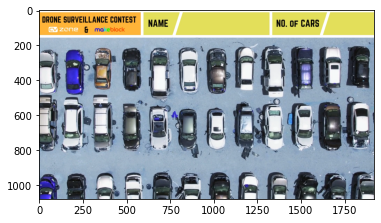

In [21]:
plt.imshow(img)

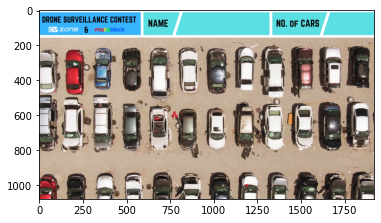

In [22]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [ ]:
ClassIndex, confidenc, bbox =model.detect(img, confThreshold=0.5)


In [25]:
print(ClassIndex)

NameError: ignored

In [ ]:
font_scale=3
font=cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(),confidenc.flatten(), bbox):
  cv2.rectangle(img,boxes,(255,0,0),2)
  cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)

In [ ]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
cap=cv2.VideoCapture("")
font_scale=3
font=cv2.FONT_HERSHEY_PLAIN
while True:
  ret,frame =cap.read()
  ClassIndex, confidenc, bbox =model.detect(frame, confThreshold=0.5)
  print(ClassIndex)
  if (len(ClassIndex)!=0):
    for ClassInd, conf, boxes in zip(ClassIndex.flatten(),confidenc.flatten(), bbox):
      if (ClassInd)<=0:
        cv2.rectangle(frame,boxes,(255,0,0),2)
        cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)
  cv2.imshow("frame",frame)
  # cv2_imshow(frame)
  if cv2.waitKey(2) & 0xFF ==ord('q'):
    break
cap.release()
cv2.destroyAllWindows()



In [ ]:
!pip install tensorflow==2.3.0

In [5]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [8]:
import cv2 as cv

cvNet = cv.dnn.readNetFromTensorflow('/content/frozen_inference_graph.pb', '/content/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt')

img = cv.imread('/content/video/02.png')
rows = img.shape[0]
cols = img.shape[1]
cvNet.setInput(cv.dnn.blobFromImage(img, size=(300, 300), swapRB=True, crop=False))
cvOut = cvNet.forward()

for detection in cvOut[0,0,:,:]:
    score = float(detection[2])
    if score > 0.3:
        left = detection[3] * cols
        top = detection[4] * rows
        right = detection[5] * cols
        bottom = detection[6] * rows
        cv.rectangle(img, (int(left), int(top)), (int(right), int(bottom)), (23, 230, 210), thickness=2)

plt.imshow(img)
cv.waitKey()


error: ignored